In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from importlib import reload

import Tree
reload(Tree)
from Tree import *

import forecast_prophet
reload(forecast_prophet)
from forecast_prophet import *

import forecast_ucm
reload(forecast_ucm)
from forecast_ucm import *

import forecast_sarimax
reload(forecast_sarimax)
from forecast_sarimax import *

import utils
reload(utils)
from utils import *

import main
reload(main)
from main import *



c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tree_spatial = Tree (dfData = df_data , sType='spatial')


vW=np.loadtxt("c:\\Users\\31683\\Desktop\\data\\M5\\weights.txt")
vW=vW[:tree_spatial.mY.shape[0]]
vW=vW/vW[0]
mW=np.diag(vW) 


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [2]:
path='c:\\Users\\31683\\Desktop\\data\\M5'
Y_path=path+f"\\sales_train_validation.pkl"  # to data file 
Y_path_eval=path+f"\\sales_train_evaluation.pkl" 

price_path=path+f"\\prices_train_val_eval.pkl"
# X_path_val_eval=path+f"\\prices_train_val_eval.pkl"  # to data file


df_data=pd.read_pickle(Y_path)
df_data.iloc[:,:4]=df_data.iloc[:,:4].astype('string') # change the type to string so that groupby maintains store and dept ids
df_data.drop(columns=['2011-01-29','2011-01-30'],inplace=True) #start on Monday

df_holidays=pd.read_csv(path+f"\\holidays.csv")
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

df_price=pd.read_pickle(price_path,compression='gzip')
df_price.drop(columns=['2011-01-29','2011-01-30'],inplace=True)

df_snap=pd.read_csv(path+f"\\calendar.csv")[['snap_CA','snap_WI','snap_TX']]
df_snap.columns=[['CA','WI','TX']]
df_snap=df_snap[2:].reset_index()
df_snap.T.columns=df_price.columns[5:]
df_snap=pd.merge(df_price.iloc[:,:5],df_snap.T,left_on='state_id',right_index=True)

vW=np.loadtxt(path+f"\\weights.txt")  #m5 competition weights
vW=vW[:114]  #drop subsetting if product level data is added

#delete below if item level is added
df_price=df_price.groupby(['state_id','store_id','cat_id','dept_id']).mean().reset_index()
df_price=df_price.drop(columns=['item_id'])
df_snap=df_snap.groupby(['state_id','store_id','cat_id','dept_id']).max().reset_index()
df_snap=df_snap.drop(columns=['item_id'])

In [3]:
dfHolidays=df_holidays
dfSNAP=df_snap
dfPrice=df_price
dfData=df_data

# Perform CV for a specified forecasting method

In [6]:
tree_spatial.forecast(iOoS=7 , sModel='ucm',
                      dfHolidays=df_holidays,
                      dfSNAP=df_snap,
                      dfPrice=df_price, sTempRecMethod=None)

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [10]:
tree_spatial.reconcile('wls_var')

In [11]:
transform=None
initial=1911-7*50
period=7
horizon=7   
forecast_method='ucm'
iOoS=7
l_methods=["bottom_up", "top_down_ph" ,"top_down_hp", "wls_var",
                  "ols" ,'mint_sample','mint_shrink','mint_diag']
l_methods_temporal=["bottom_up", "top_down_ph" ,"top_down_hp" ,"ols","wls_svar" ,
                    "wls_acov", "wls_struct" , "wls_hvar" , "mint_sample", "mint_shrink" ,"mint_diag"]
dfHolidays=df_holidays
dfSNAP=df_snap
dfPrice=df_price
dfData=df_data

tree_spatial=Tree( dfData= dfData , sType='spatial') 
dOutputs  = tree_spatial.cross_validation(sTransform=transform, 
                                           dfHolidays=dfHolidays, dfSNAP=dfSNAP,dfPrice=dfPrice,
                                           iInitial=initial, iPeriod=period, iHorizon=horizon , lMethods=l_methods ,
                                           sForecastMethod=forecast_method,sTempRecMethod=None)

with open(os.getcwd()+"\\outputs\\ddCVOutputsSpatial_ucm_3.pkl", "wb") as myFile:
    pickle.dump(dOutputs, myFile)


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Number of CV folds = 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 1 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 2 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 3 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 4 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 5 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 6 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 7 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 8 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 9 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 10 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 11 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 12 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 13 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 14 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 15 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 16 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 17 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 18 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 19 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 20 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 21 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 22 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 23 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 24 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 25 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 26 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 27 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 28 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 29 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 30 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 31 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 32 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 33 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 34 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 35 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 36 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 37 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 38 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 39 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 40 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 41 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 42 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 43 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 44 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 45 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 46 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 47 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 48 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 49 of 50


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


CV iterations completed = 50 of 50


In [12]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_ucm_3.pkl', 'rb') as file:
    ddOutputs_spatial_ucm= pickle.load(file)  

with open(os.getcwd()+'\\outputs\\ddCVOutputs_spatial_temporal_sarimax_log.pkl', 'rb') as file:
    ddOutputs_spatial_temporal_sarimax= pickle.load(file)  
    
    


# Tune

In [ ]:
# import Tree
# reload(Tree)
# from Tree import *

transform=None
dfHolidays=df_holidays
random_size=50
initial=1911-7*50
period=7
horizon=7
sForecastMethod=forecast_method

l_methods=["bottom_up", "top_down_ph" ,"top_down_hp", 'wls', "ols" ,'mint_sample','mint_shrink','mint_diag']
l_methods_temporal=["bottom_up", "top_down_ph" ,"top_down_hp","wls_svar" , "wls_acov",
                    "wls_struct" , "wls_hvar" , "mint_sample", "mint_shrink"]

tree=Tree( dfData= df_data, sType='spatial') 
tree.tune_temporal_prophet(sTransform=transform, iSize=random_size, iInitial=initial, iPeriod=period, iHorizon=horizon , dfHolidays=df_holidays , sForecastMethod=forecast_method )
# output ddParams_timestamp.pkl to data folder


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


Number of CV iterations used for tuning = 11
Tuning has began


Tuning Progress: 100%|██████████| 91/91 [33:27<00:00, 22.06s/it]

Tuning has been terminated succesfully


# Plots and Tables

In [44]:
tree_spatial=Tree( dfData = df_data , sType='spatial') 
slices = [len([sublist for sublist in tree_spatial.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_spatial.levels)]
slices.append(1)
slices

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


[70, 30, 10, 3, 1]

In [23]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_ucm.pkl', 'rb') as file:
    ddOutputs_spatial_ucm= pickle.load(file)  
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_prophet_log.pkl', 'rb') as file:
    ddOutputs_spatial_prophet = pickle.load(file) 

In [25]:
ddOutputs_spatial_ucm.keys()

dict_keys(['bottom_up', 'top_down_ph', 'top_down_hp', 'wls', 'ols', 'mint_sample', 'mint_shrink', 'mint_diag'])

In [26]:
ddOutputs_spatial_ucm['bottom_up'].keys()

dict_keys(['mYtrue', 'mYhat', 'mYtilde', 'mW'])

## RMSE by iteration and horizon

c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\31683\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


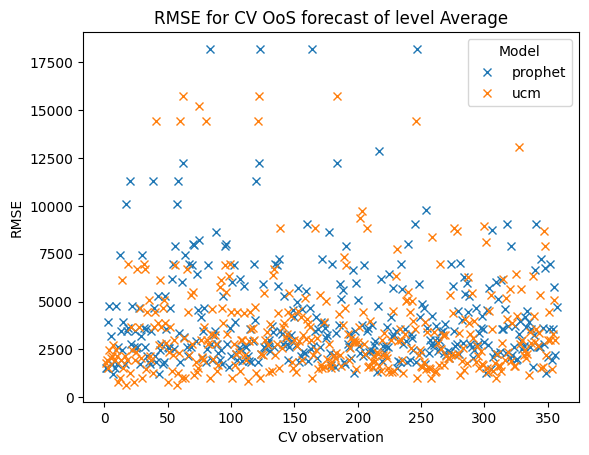

In [100]:
horizons=[1,2 ,3, 4,  5 , 6 , 7]
horizon=7
relative='Base'
level='Average'
iters=int(ddOutputs_spatial_prophet['bottom_up']['mYhat'].shape[1]/horizon)
metric='RMSE'


for j in range(2):
    if j==0:
        ddOutputs=ddOutputs_spatial_prophet
        label='prophet'
    else:
        ddOutputs=ddOutputs_spatial_ucm
        label='ucm'
    vValues=[]
    for iter in range(1, iters+1):
        for h in horizons:
            df = getCVResults(h=h, iOoS=h,
                                ddOutputs=ddOutputs, metric=metric, 
                                slices=slices, 
                                iters=iter, 
                                rolling=False,
                                relative=False,predicted="hat")['bottom_up']
            vValues.append(df[df.index == level].item())
    plt.plot(np.arange(1,7*iters+1), vValues,'x' ,label=label)
plt.legend(title="Model")
plt.xlabel("CV observation")
plt.ylabel(f"RMSE")
plt.title(f"{metric} for CV OoS forecast of level {level}")

# Show the plot
plt.show()


## RMSE by iteration and horizon

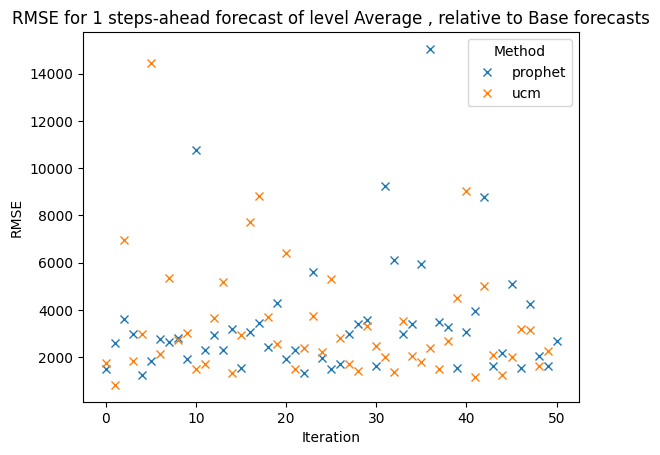

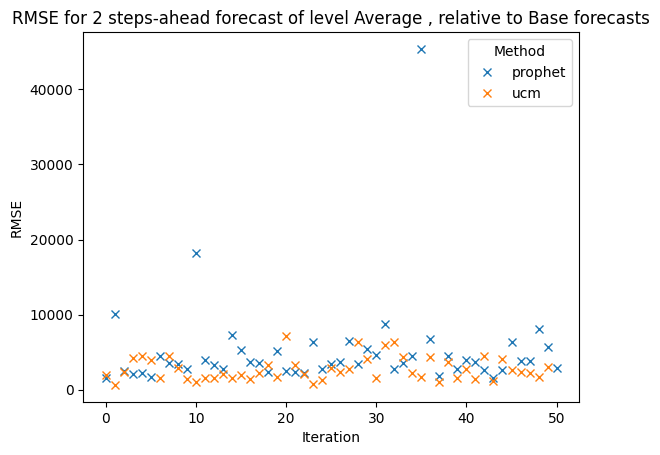

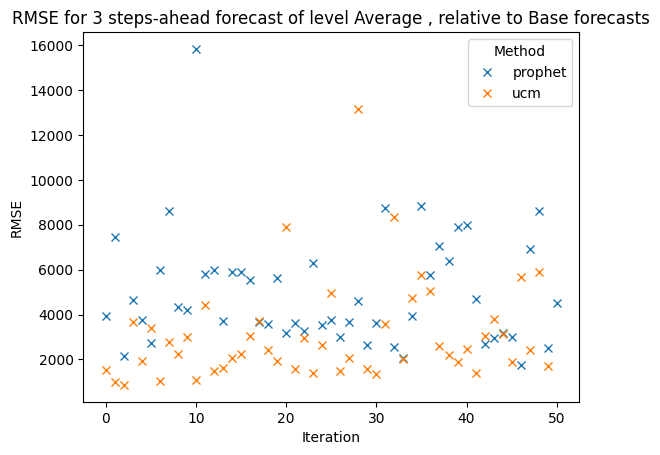

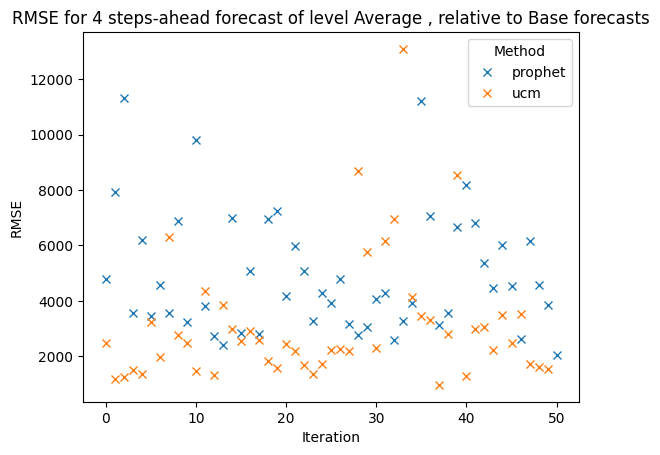

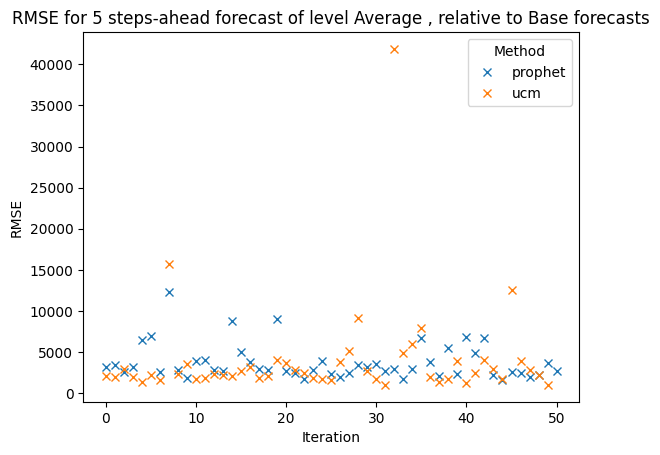

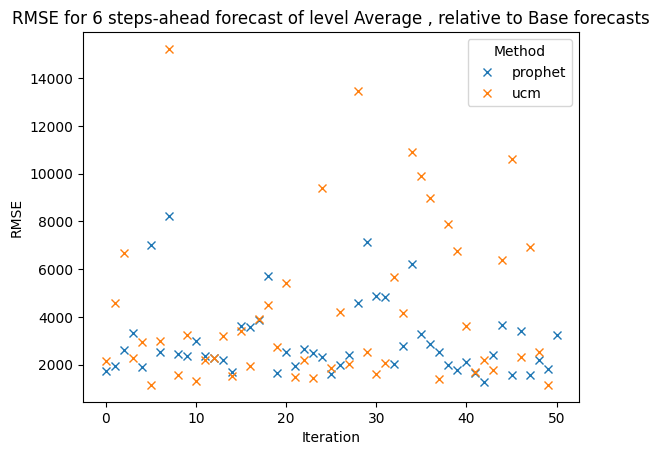

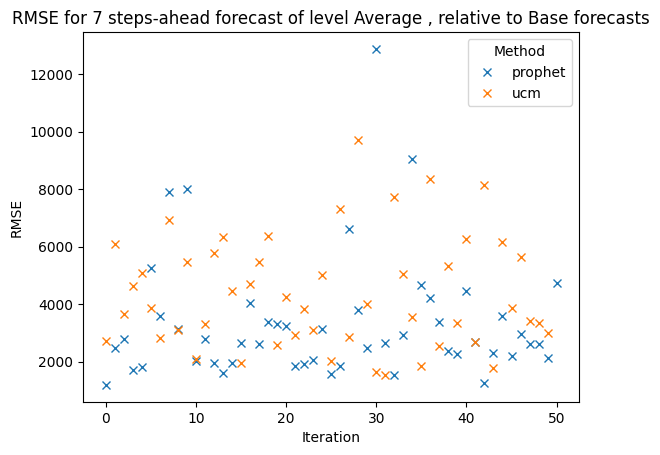

In [14]:
horizons=[1,2 ,3, 4,  5 , 6 , 7]

relative='Base'
level='Average'
iters=int(ddOutputs_spatial_prophet['bottom_up']['mYhat'].shape[1]/7)
metric='RMSE'

plt.figure()
for h in horizons:
    for j in range(2):
        if j==0:
            ddOutputs=ddOutputs_spatial_prophet
            label='prophet'
        else:
            ddOutputs=ddOutputs_spatial_ucm
            label='ucm'
            
        vValues = np.zeros(iters)
        for iter in range(1, iters+1):
            df = getCVResults(h=h, iOoS=7,
                            ddOutputs=ddOutputs, metric=metric, 
                            slices=slices, 
                            iters=iter, 
                            rolling=False,
                            relative=False,predicted="hat")['bottom_up']
            vValues[iter-1] = df[df.index == level].item()    
        plt.plot(np.arange(iters), vValues,'x' ,label=label)


    plt.legend(title="Method")
    plt.xlabel("Iteration")
    plt.ylabel(f"RMSE")
    plt.title(f"{metric} for {h} steps-ahead forecast of level {level} , relative to {relative} forecasts")

    # Show the plot
    plt.show()


### MAPE across horizons for Prophet and UCM

In [24]:
horizons=[1,2 ,3, 4,  5 , 6 , 7]

relative='Base'
level='Average'
iters=int(ddOutputs_spatial_prophet['bottom_up']['mYhat'].shape[1]/horizon)
metric='MAPE'

plt.figure()
data=[]
labels=['prophet','ucm']
df1=pd.DataFrame()
df2=pd.DataFrame()
for h in horizons:
    for j in range(2):
        if j==0:
            ddOutputs=ddOutputs_spatial_prophet
            label='prophet'
        else:
            ddOutputs=ddOutputs_spatial_ucm
            label='ucm'
            
        vValues = np.zeros(iters-1)
        for iter in range(1, iters):
            df = getCVResults(h=h, iOoS=horizon,
                            ddOutputs=ddOutputs, metric=metric, 
                            slices=slices, 
                            iters=iter, 
                            rolling=False,
                            relative=False,predicted="hat")['bottom_up']
            vValues[iter-1] = df[df.index == level].item()  
        if j==0:
            df1[str(h)]=vValues
        else:
            df2[str(h)]=vValues
        
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# pd.melt converts the dataframe to long form, pd.concat combines them
df = pd.concat({'Prophet': df1.melt(), 'UCM': df2.melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source',  palette='muted', showfliers=False)    
plt.xlabel('Horizon')
plt.ylabel('MPE')
plt.axhline(y=0, color='red')
plt.title('MPE (forecast error) across 50 iterations for level '+str(level))
plt.legend(title='Forecasting Method')
plt.show()

NameError: name 'horizon' is not defined

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

horizon=7
relative = 'Base'
horizons = [1, 2, 3, 4, 5, 6, 7]
iters = int(ddOutputs_spatial_prophet['bottom_up']['mYhat'].shape[1] / horizon)
metric = 'MAPE'

# plt.figure(figsize=(12, 6))

data = []
labels = ['prophet', 'ucm']

dfProphet_MPE=pd.DataFrame()
dfUCM_MPE=pd.DataFrame()

for h in horizons:
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    # Generate the data for each level and model (prophet, ucm)
    for level in ['Total', 'State', 'Store', 'Cat.', 'Dept.']:
        for j in range(2):
            if j == 0:
                ddOutputs = ddOutputs_spatial_prophet
                label = 'prophet'
            else:
                ddOutputs = ddOutputs_spatial_ucm
                label = 'ucm'

            vValues = np.zeros(iters - 1)
            for iter in range(1, iters):
                df = getCVResults(h=h, iOoS=h,
                                ddOutputs=ddOutputs, metric=metric,
                                slices=slices,
                                iters=iter,
                                rolling=False,
                                relative=False, predicted="hat")['bottom_up']
                vValues[iter - 1] = df[df.index == level].item()

            if j == 0:
                df1[level] = vValues
            else:
                df2[level] = vValues

    df1=df1.median(axis=0).T
    df2=df2.median(axis=0).T
    
    dfProphet_MPE[h]=df1
    dfUCM_MPE[h]=df2

In [ ]:
dfProphet_MPE  #median

,1,2,3,4,5,6,7
Total,0.04,0.06,0.06,0.05,0.04,0.03,0.04
State,0.17,0.18,0.20,0.20,0.15,0.14,0.17
Store,0.78,0.93,0.99,0.94,0.87,0.80,0.82
Cat.,3.44,3.50,3.56,3.81,3.27,3.65,3.47
Dept.,11.66,12.40,12.87,12.79,12.74,12.54,12.80


In [ ]:
dfUCM     #median

,1,2,3,4,5,6,7
Total,0.04,0.04,0.03,0.04,0.04,0.04,0.06
State,0.15,0.16,0.17,0.16,0.15,0.15,0.19
Store,0.69,0.64,0.69,0.69,0.55,0.57,0.72
Cat.,3.10,2.93,3.10,2.89,2.71,2.66,2.77
Dept.,10.08,9.68,10.54,10.21,9.07,9.25,9.38


### SARIMAX in sample error diagnostics

In [64]:
tree_spatial = Tree (dfData = df_data , sType='spatial')
tree_spatial.forecast(iOoS=7 , sModel='sarimax',
                      dfHolidays=df_holidays,
                      dfSNAP=df_snap,
                      dfPrice=df_price, sTempRecMethod='wls_hvar')

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_leafs.extend(df.values.tolist())
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_leafs.extend(df.values.tolist())
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

KeyboardInterrupt: 

# Prophet and UCM , in sample error diagnostics

In [20]:
tree_spatial = Tree (dfData =df_data , sType='spatial')
tree_spatial.forecast(iOoS=7 , sModel='ucm',
                      dfHolidays=df_holidays,
                      dfSNAP=df_snap,
                      dfPrice=df_price, sTempRecMethod=None)






c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None
c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

KeyboardInterrupt: 

C:\Users\31683\AppData\Local\Temp\ipykernel_14712\4135246462.py:21: RuntimeWarning: divide by zero encountered in true_divide
  np.abs((tree_spatial_prophet.mY - tree_spatial_prophet.mYhatIS) / tree_spatial_prophet.mY) * 100,
C:\Users\31683\AppData\Local\Temp\ipykernel_14712\4135246462.py:26: RuntimeWarning: divide by zero encountered in true_divide
  np.abs((tree_spatial.mY - tree_spatial.mYhatIS) / tree_spatial.mY) * 100,
C:\Users\31683\AppData\Local\Temp\ipykernel_14712\4135246462.py:21: RuntimeWarning: divide by zero encountered in true_divide
  np.abs((tree_spatial_prophet.mY - tree_spatial_prophet.mYhatIS) / tree_spatial_prophet.mY) * 100,
C:\Users\31683\AppData\Local\Temp\ipykernel_14712\4135246462.py:26: RuntimeWarning: divide by zero encountered in true_divide
  np.abs((tree_spatial.mY - tree_spatial.mYhatIS) / tree_spatial.mY) * 100,
C:\Users\31683\AppData\Local\Temp\ipykernel_14712\4135246462.py:21: RuntimeWarning: divide by zero encountered in true_divide
  np.abs((tree_spa

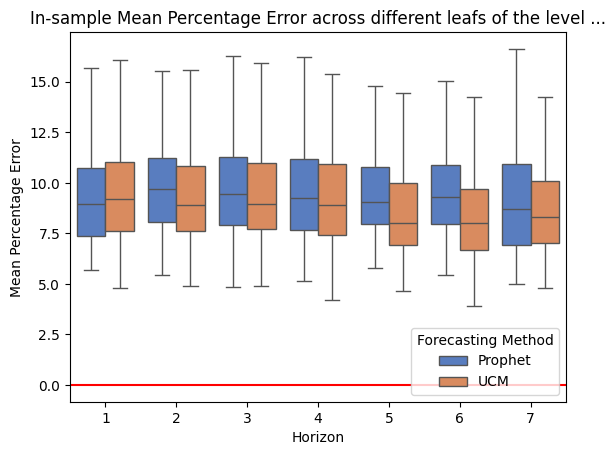

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

horizons = [1, 2, 3, 4, 5, 6, 7]


# plt.figure(figsize=(12, 6))

data = []
labels = ['prophet', 'ucm']
level=0
df1 = pd.DataFrame()
df2 = pd.DataFrame()
for h in horizons:

    for j in range(2):
        if j == 0:
            mError = np.where(tree_spatial_prophet.mY != 0, 
                            np.abs((tree_spatial_prophet.mY - tree_spatial_prophet.mYhatIS) / tree_spatial_prophet.mY) * 100, 
                            0)
            label = 'prophet'
        else:
            mError = np.where(tree_spatial.mY != 0, 
                            np.abs((tree_spatial.mY - tree_spatial.mYhatIS) / tree_spatial.mY) * 100, 
                            0)

            
            label='ucm'      
        # tError=split_matrix(mError,  tree_spatial.dLevels)
        # mError=tError[level][:,28:]   
        vValues = np.median(mError[:,(h-1)::7],axis=0)  
        if j==0:
            df1[str(h)]=vValues
        else:
            df2[str(h)]=vValues



    

df = pd.concat({'Prophet': df1.melt(), 'UCM': df2.melt()}, names=['source', 'old_index'])
# convert the source index to a column, and reset the old index
df = df.reset_index(level=0).reset_index(drop=True)

sns.boxplot(data=df, x='variable', y='value', hue='source',  palette='muted', showfliers=False)    
plt.xlabel('Horizon')
plt.ylabel('Mean Percentage Error')
plt.axhline(y=0, color='red')
plt.title("In-sample Mean Percentage Error across different leafs of the level ...")
plt.legend(title='Forecasting Method')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


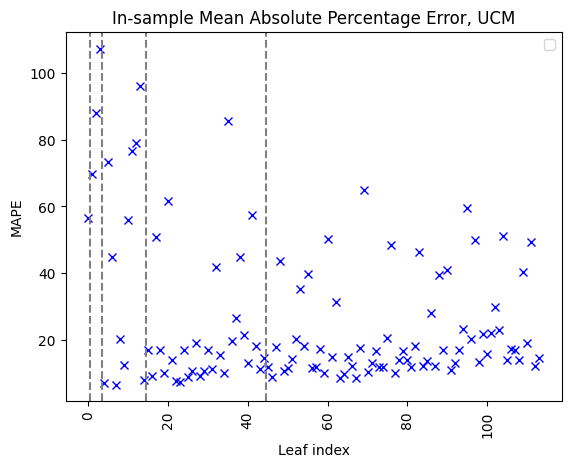

In [ ]:
vMape=np.zeros(tree_spatial.mY.shape[0])
for i in range(tree_spatial.mY.shape[0]):
    s=tree_spatial.dForecasters[i]
    mape=np.mean(np.abs((s.vY[s.vY != 0] - s.vYhatIS[s.vY != 0]) / s.vY[s.vY != 0])) * 100
    vMape[i]=mape
plt.plot(vMape[7*4:] , marker='x' , linestyle='', color='blue')
plt.xlabel('Leaf index')
plt.xticks(rotation=90)
plt.axvline(x=0.5,linestyle="--",color='grey')
plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('MAPE')
plt.title('In-sample Mean Absolute Percentage Error, UCM')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


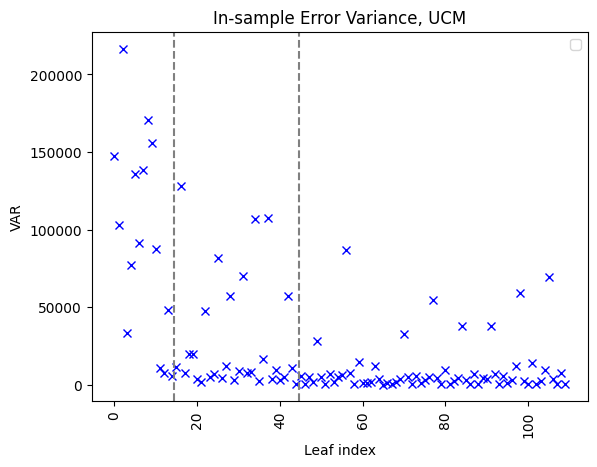

In [328]:
vMape=np.zeros(tree_spatial.mY.shape[0])
for i in range(tree_spatial.mY.shape[0]):
    vMape[i]=tree_spatial.dForecasters[i].var
plt.plot(vMape[4:] , marker='x' , linestyle='', color='blue')
plt.xlabel('Leaf index')
plt.xticks(rotation=90)
# plt.axvline(x=0.5,linestyle="--",color='grey')
# plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('VAR')
plt.title('In-sample Error Variance, UCM')
plt.legend()
plt.show()

In [1]:
df=pd.DataFrame(columns=["Mean zero", "Constant Variance", "No autocorrelation"])
for i in range(tree_spatial.mY.shape[0]):
    vRes=tree_spatial.dForecasters[i].vRes
    df.loc[i,"Mean zero"]=one_sample_t_test(vRes,fAlpha=0.3)[1]
    df.loc[i,"Constant Variance"]=levene_test(vRes,fAlpha=0.01)[1]
    # df.loc[i,"Normality"]=jarque_bera_test(vRes,fAlpha=0.01)[1]
    df.loc[i,"No autocorrelation"]=ljung_box_test(vRes, lags=1, fAlpha=0.01 )[1]
df_numeric = df.replace({True: 1, False: 0})
# Plot the heatmap
# Create a custom colormap where 0 (No) is red and 1 (Yes) is blue
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["red", "blue"])

# Plot the heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(
    df_numeric.T,
    cmap=custom_cmap,
    cbar_kws={'label': 'Test requirement met (1: Yes, 0: No)'},
    annot=False,  # Add annotations if required
    linewidths=0.5  # Optional: for better gridlines
)

plt.title("Pass/Fail results of residuals hypothesis tests for Daily time series")
plt.xlabel("Sample Index")
plt.xticks(rotation=90)
plt.ylabel("Testing for")
plt.show()


NameError: name 'pd' is not defined

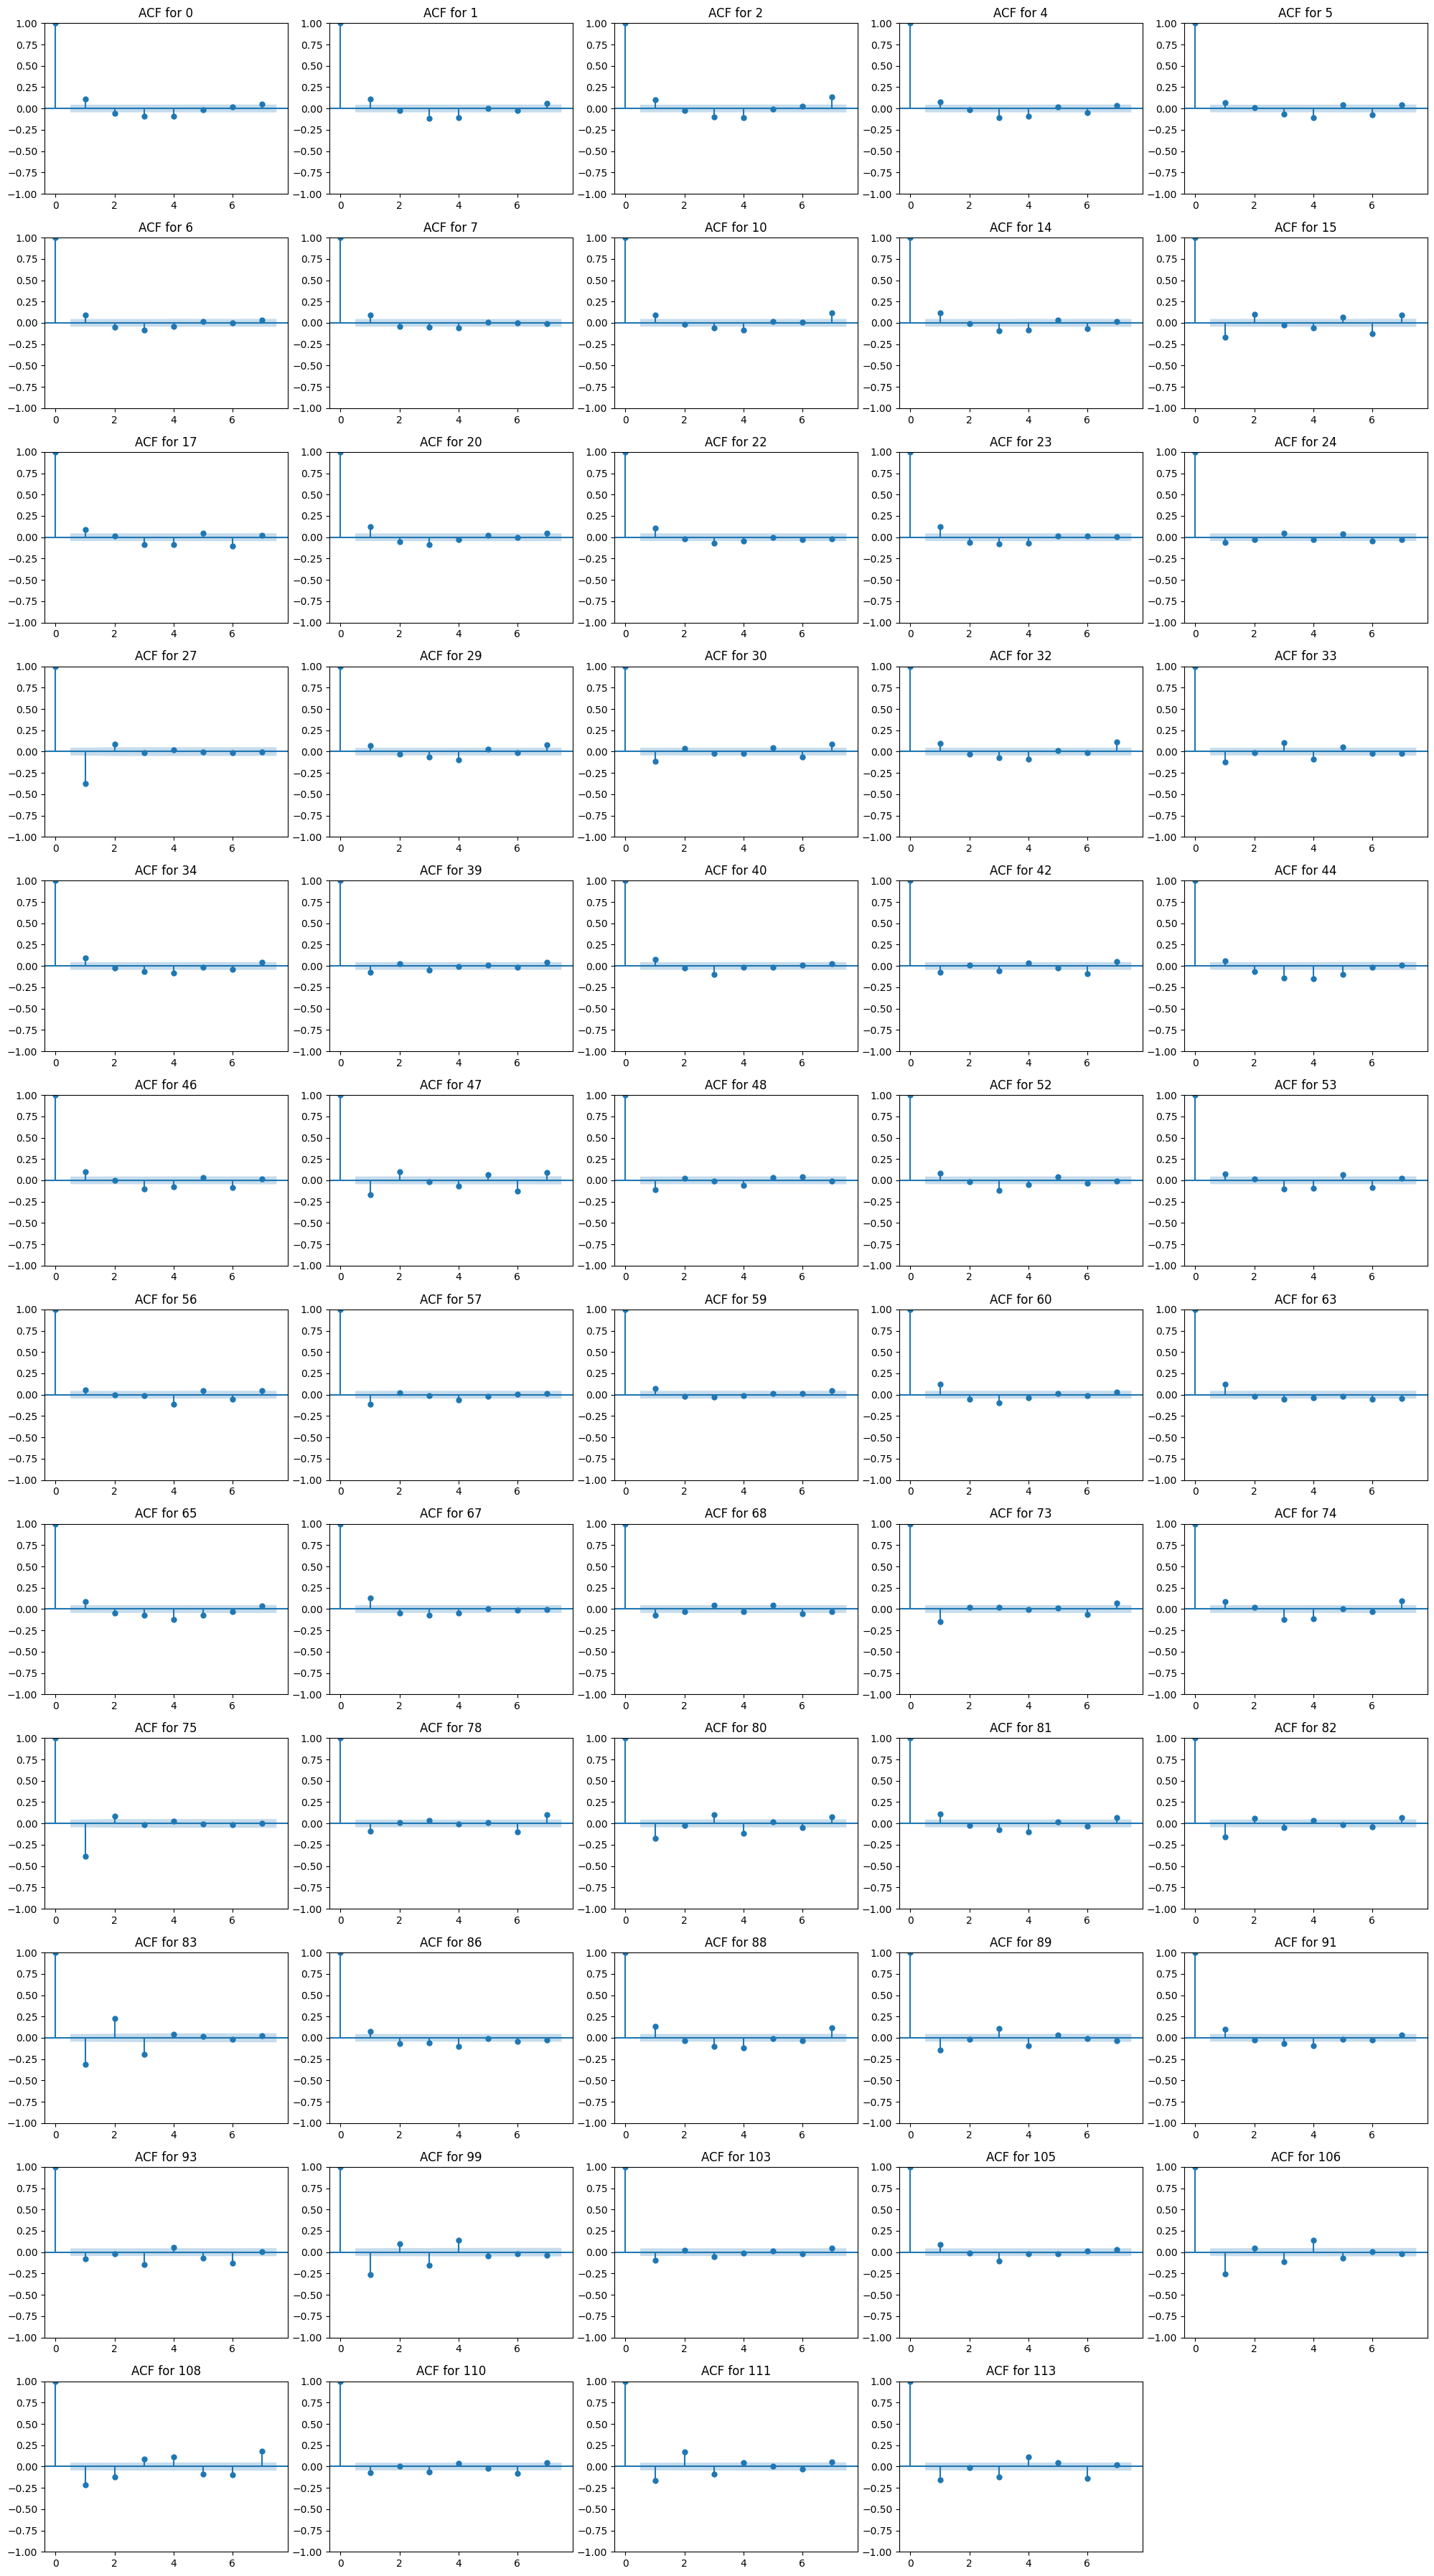

In [145]:
# Get the indices where 'No autocorrelation' is 1
indices = df_numeric[df_numeric['No autocorrelation'] == 0].index

# Determine the number of plots
num_plots = len(indices)

# Define grid size (rows and columns) for a compact layout
cols = min(5, num_plots)  # Maximum 4 columns for better readability
rows = int(np.ceil(num_plots / cols))  # Adjust rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # Adjust figure size

# Flatten axes if multiple subplots exist
axes = np.array(axes).flatten() if num_plots > 1 else [axes]

# Plot each ACF in a subplot
for ax, i in zip(axes, indices):
    plot_acf(tree_spatial.dForecasters[i].vRes, lags=7, ax=ax)
    ax.set_title(f"ACF for {i}")

# Hide any unused subplots
for j in range(len(indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

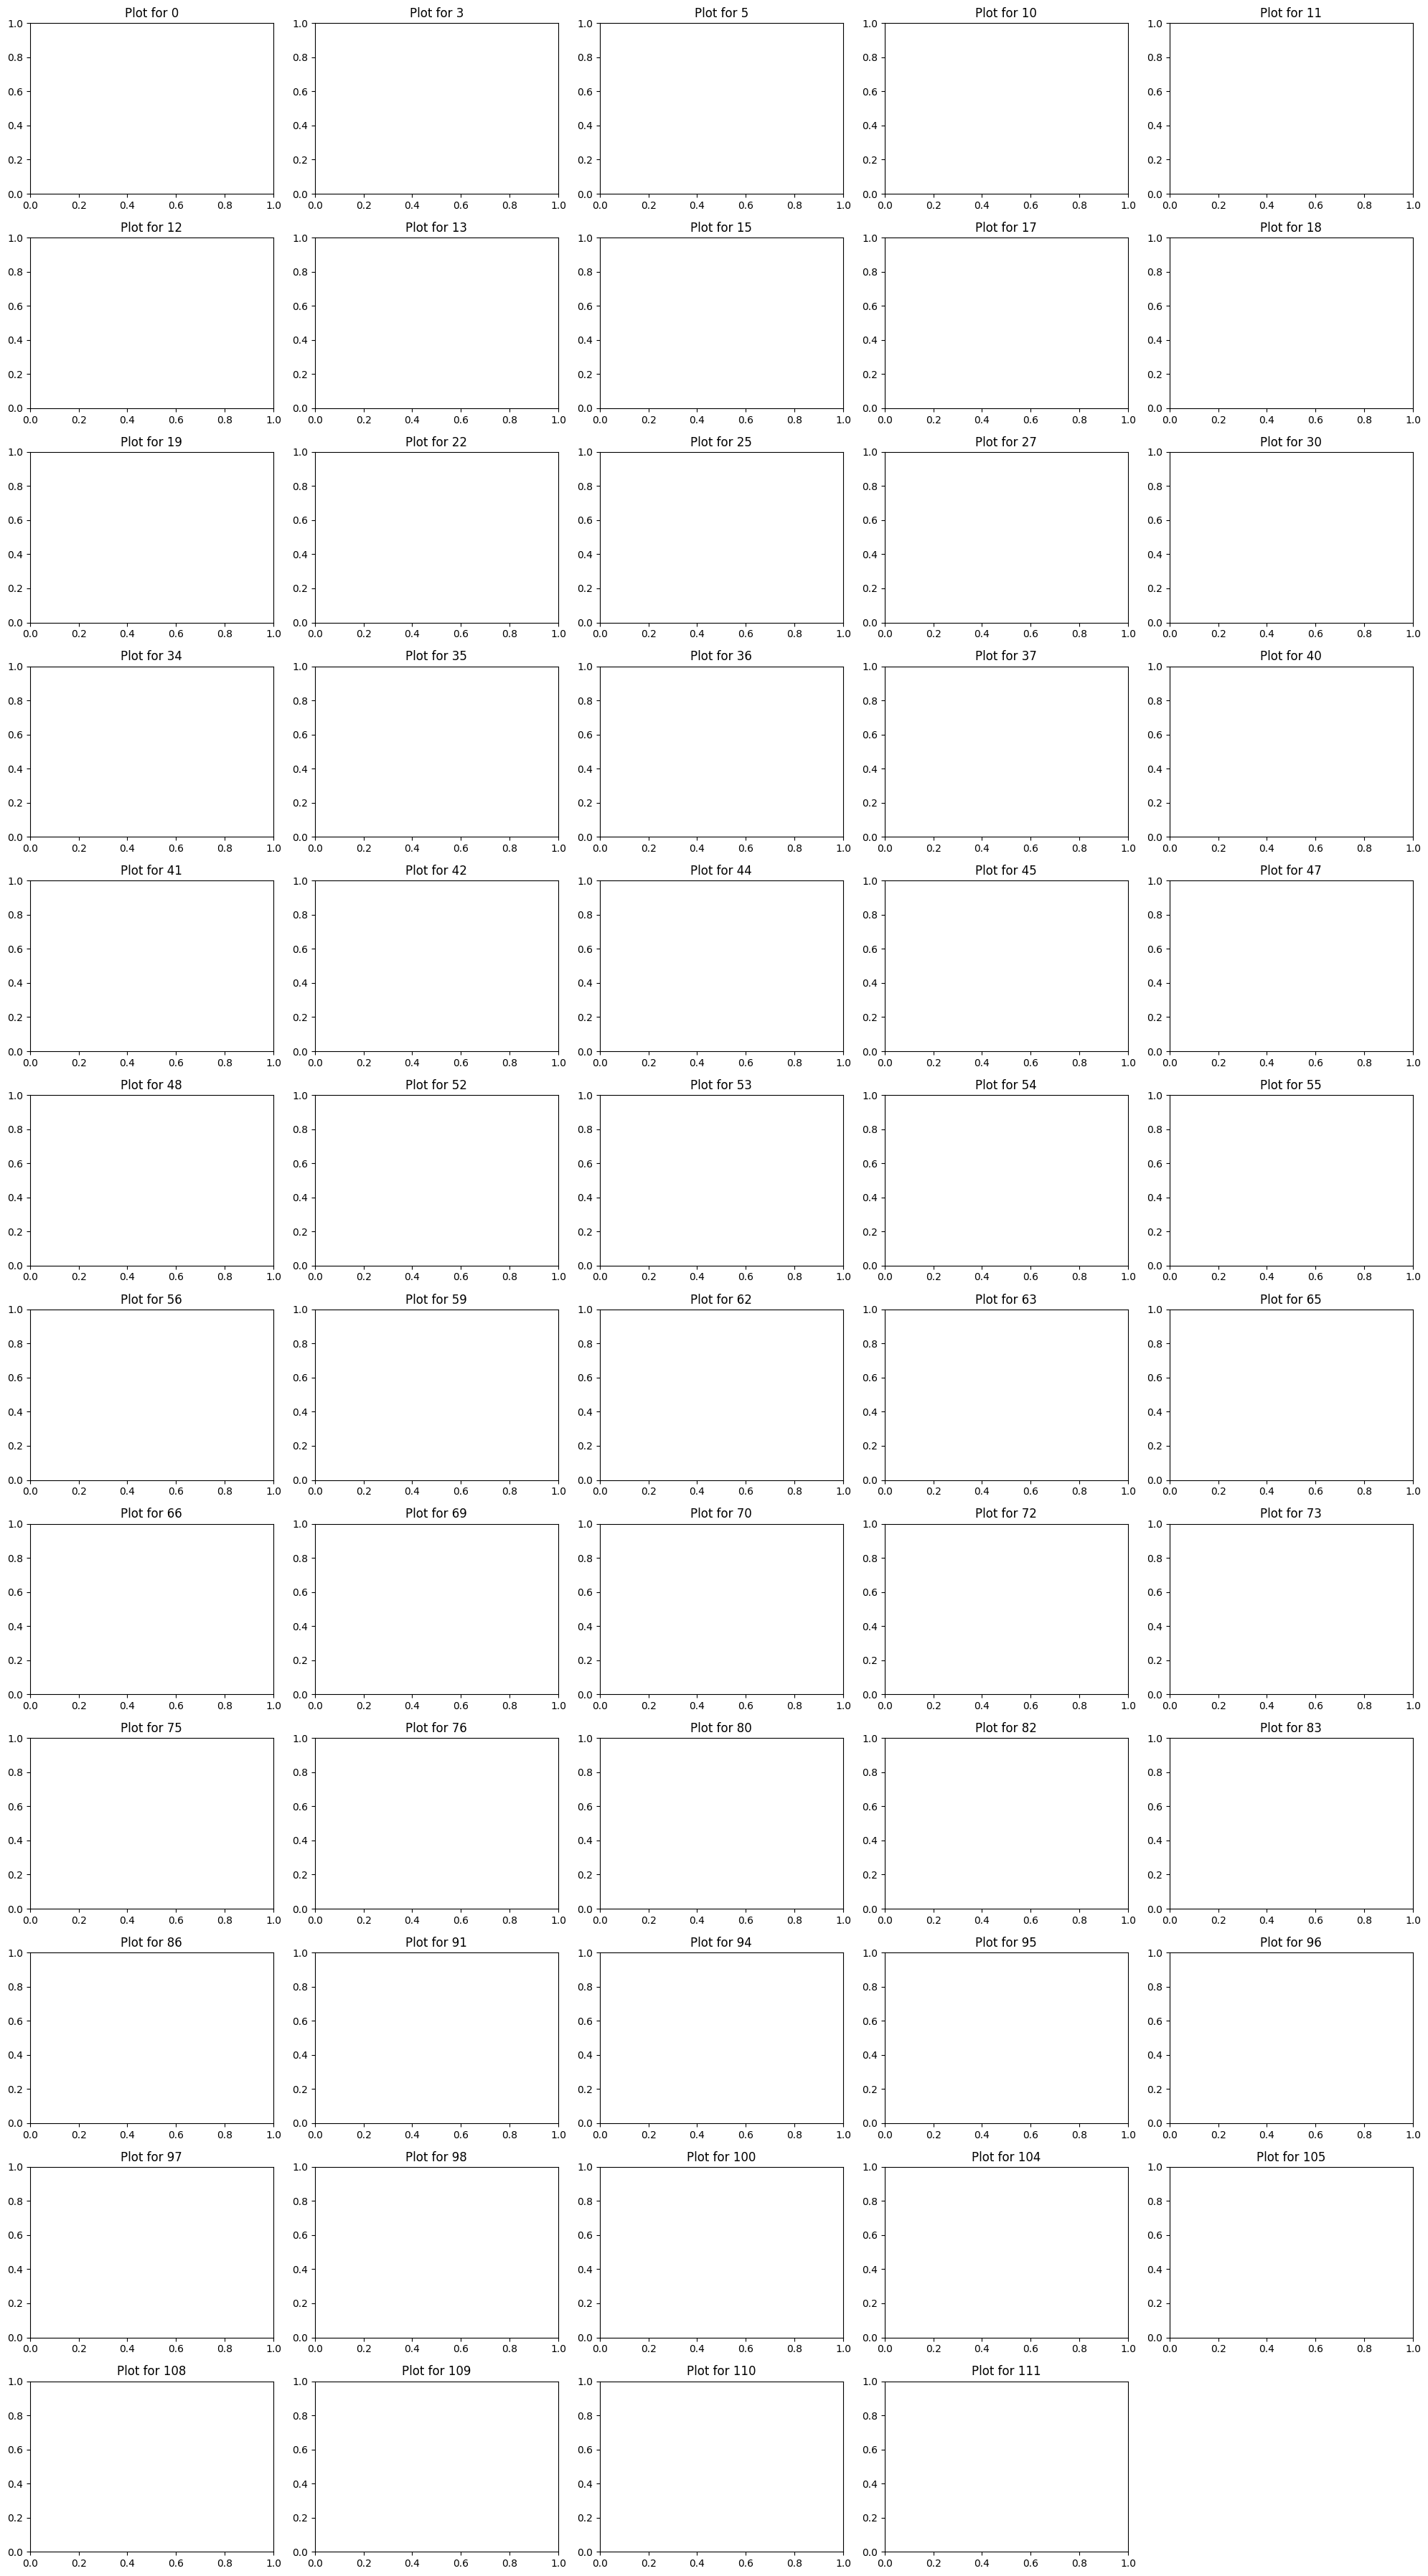

In [312]:
# Get the indices where 'No autocorrelation' is 1
indices = df_numeric[df_numeric['Constant Variance'] == 0].index

# Determine the number of plots
num_plots = len(indices)

# Define grid size (rows and columns) for a compact layout
cols = min(5, num_plots)  # Maximum 4 columns for better readability
rows = int(np.ceil(num_plots / cols))  # Adjust rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # Adjust figure size

# Flatten axes if multiple subplots exist
axes = np.array(axes).flatten() if num_plots > 1 else [axes]

# Plot each ACF in a subplot
for ax, i in zip(axes, indices):
    plt.plot(tree_spatial.dForecasters[i].vRes)
    ax.set_title(f"Plot for {i}")

# Hide any unused subplots
for j in range(len(indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Prophet

In [14]:
tree_spatial_prophet = Tree (dfData =df_data , sType='spatial')
tree_spatial_prophet.forecast_prophet(iOoS=7, sTransform='log',dfHolidays=df_holidays)



c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


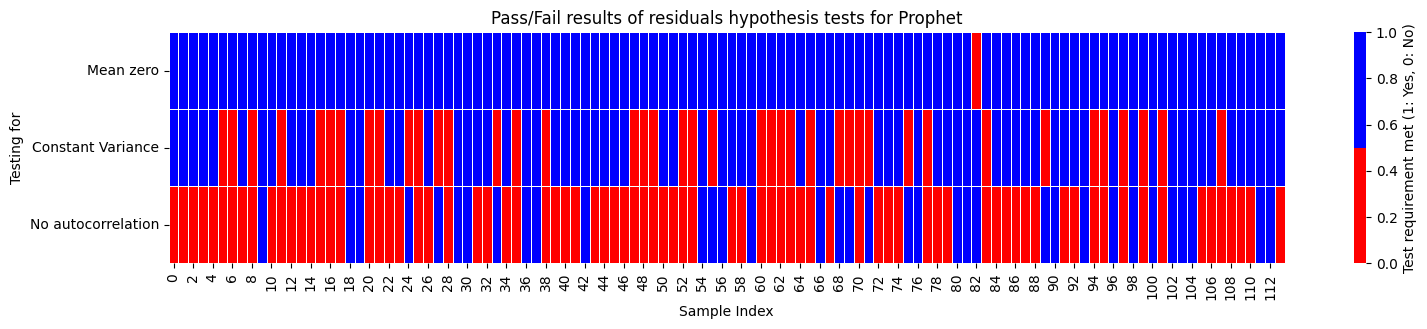

In [402]:
df=pd.DataFrame(columns=["Mean zero", "Constant Variance", "No autocorrelation"])
for i in range(tree_spatial_prophet.mY.shape[0]):
    vRes=tree_spatial_prophet.dForecasters[i].vRes
    df.loc[i,"Mean zero"]=one_sample_t_test(vRes,fAlpha=0.1)[1]
    df.loc[i,"Constant Variance"]=levene_test(vRes,fAlpha=0.01)[1]
    # df.loc[i,"Normality"]=jarque_bera_test(vRes,fAlpha=0.01)[1]
    df.loc[i,"No autocorrelation"]=ljung_box_test(vRes, lags=1, fAlpha=0.01 )[1]
df_numeric = df.replace({True: 1, False: 0})
# Plot the heatmap
# Create a custom colormap where 0 (No) is red and 1 (Yes) is blue
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["red", "blue"])

# Plot the heatmap
plt.figure(figsize=(18, 3))
sns.heatmap(
    df_numeric.T,
    cmap=custom_cmap,
    cbar_kws={'label': 'Test requirement met (1: Yes, 0: No)'},
    annot=False,  # Add annotations if required
    linewidths=0.5  # Optional: for better gridlines
)

plt.title("Pass/Fail results of residuals hypothesis tests for Prophet")
plt.xlabel("Sample Index")
plt.xticks(rotation=90)
plt.ylabel("Testing for")
plt.show()


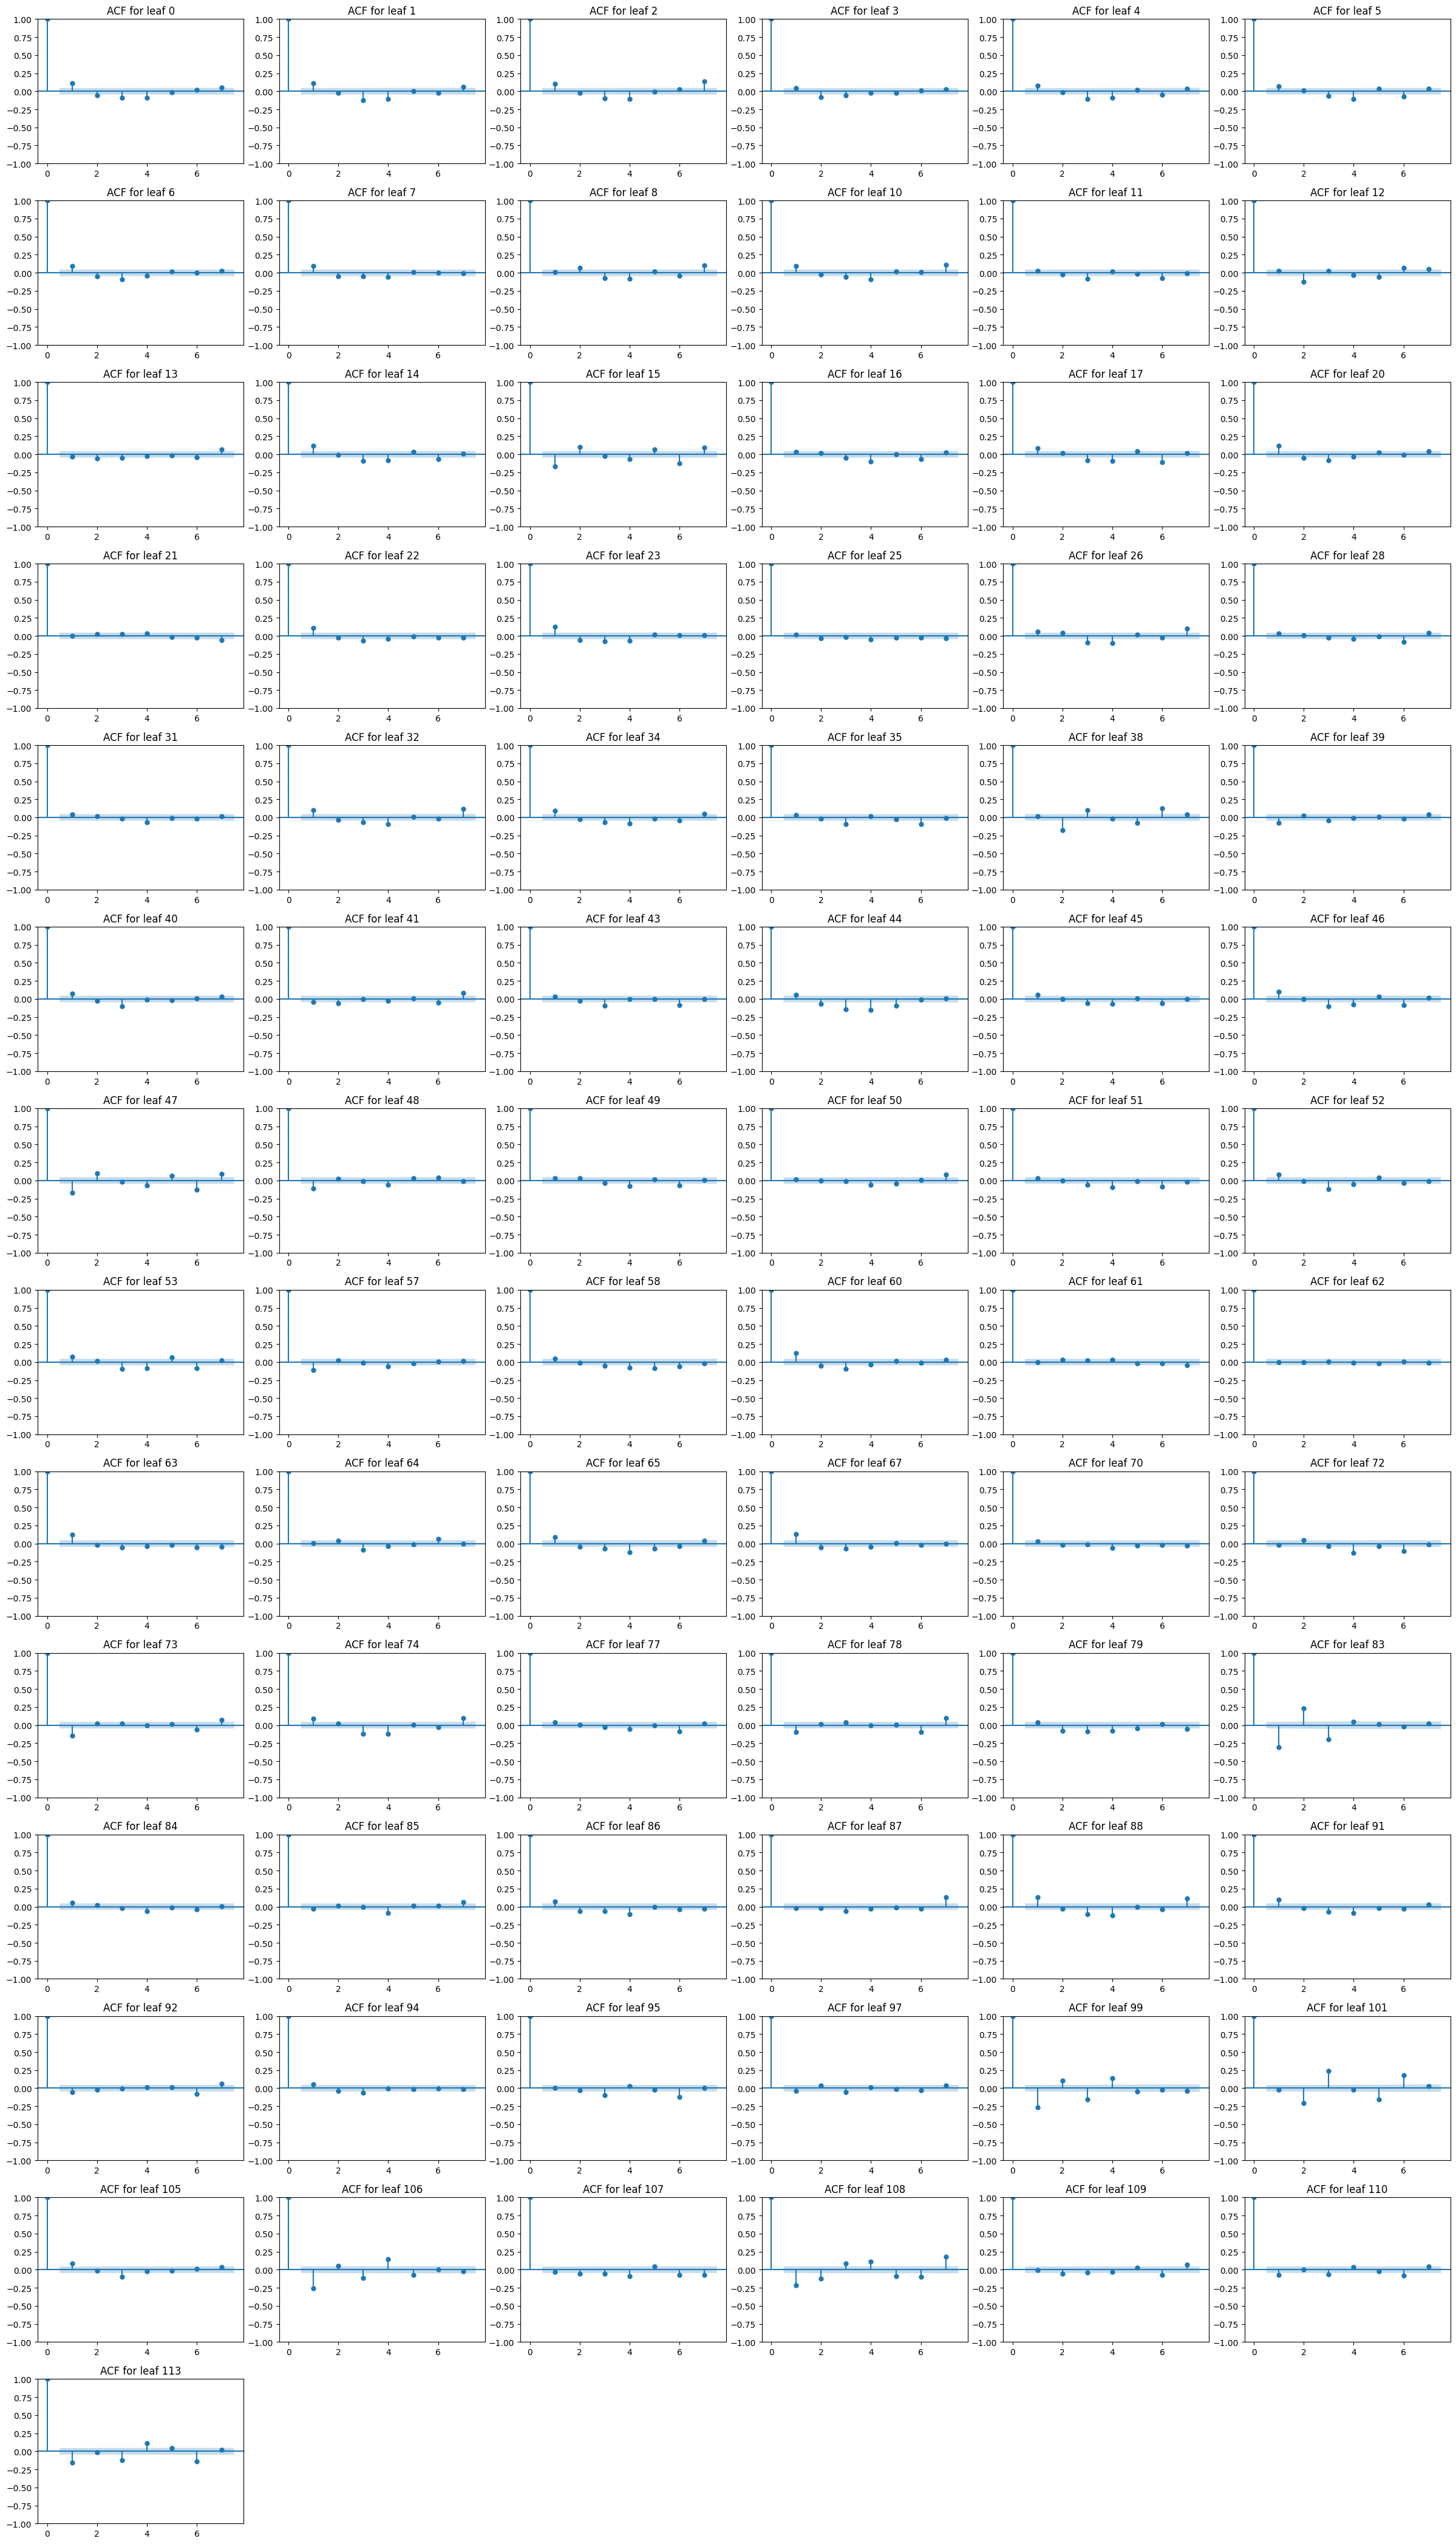

In [149]:

# Get the indices where 'No autocorrelation' is 1
indices = df_numeric[df_numeric['No autocorrelation'] == 0].index

# Determine the number of plots
num_plots = len(indices)

# Define grid size (rows and columns) for a compact layout
cols = min(6, num_plots)  # Maximum 4 columns for better readability
rows = int(np.ceil(num_plots / cols))  # Adjust rows dynamically

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))  # Adjust figure size

# Flatten axes if multiple subplots exist
axes = np.array(axes).flatten() if num_plots > 1 else [axes]

# Plot each ACF in a subplot
for ax, i in zip(axes, indices):
    plot_acf(tree_spatial.dForecasters[i].vRes, lags=7, ax=ax)
    ax.set_title(f"ACF for leaf {i}")

# Hide any unused subplots
for j in range(len(indices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


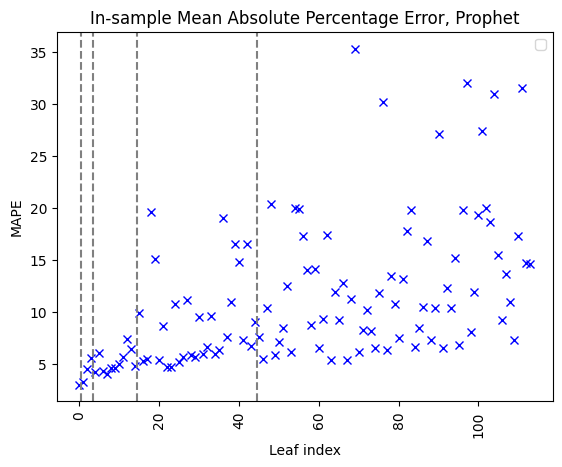

In [60]:
vMape=np.zeros(tree_spatial.mY.shape[0])
for i in range(tree_spatial.mY.shape[0]):
    vMape[i]=tree_spatial_prophet.dForecasters[i].mape
plt.plot(vMape , marker='x' , linestyle='', color='blue')
plt.xlabel('Leaf index')
plt.xticks(rotation=90)
plt.axvline(x=0.5,linestyle="--",color='grey')
plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('MAPE')
plt.title('In-sample Mean Absolute Percentage Error, Prophet')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


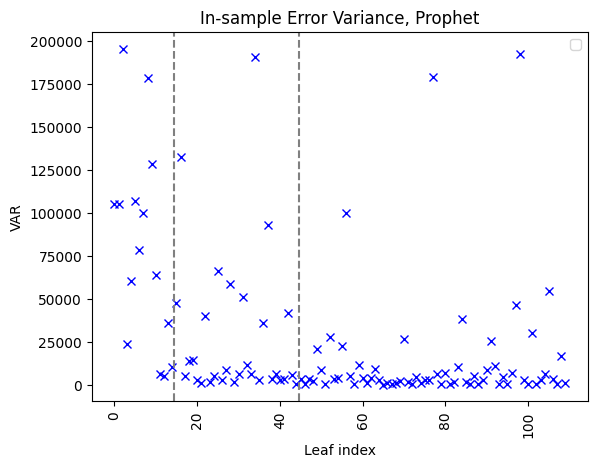

In [69]:
vMape=np.zeros(tree_spatial_prophet.mY.shape[0])
for i in range(tree_spatial_prophet.mY.shape[0]):
    vMape[i]=tree_spatial_prophet.dForecasters[i].var
plt.plot(vMape[4:] , marker='x' , linestyle='', color='blue')
plt.xlabel('Leaf index')
plt.xticks(rotation=90)
# plt.axvline(x=0.5,linestyle="--",color='grey')
# plt.axvline(x=3.5,linestyle="--",color='grey')
plt.axvline(x=14.5,linestyle="--",color='grey')
plt.axvline(x=44.5,linestyle="--",color='grey')
plt.ylabel('VAR')
plt.title('In-sample Error Variance, Prophet')
plt.legend()
plt.show()

### Compare 3 different spatial hierarchical forecasting methods : Spatial , Spatio Temporal TD and Spatio Temporal CV

In [59]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_ucm.pkl', 'rb') as file:
    ddOutputs_spatial_ucm= pickle.load(file)  
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_prophet_log.pkl', 'rb') as file:
    ddOutputs_spatial = pickle.load(file) 
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_temporal_prophet_tdhp_mYtildeIS_log.pkl', 'rb') as file:
    ddOutputs_spatio_temporal_tdhp = pickle.load(file) 
# with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_temporal_prophet_cv_log.pkl', 'rb') as file:
#     ddOutputs_spatio_temporal_cv= pickle.load(file) 
 

with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_temporal_prophet_tdhp_40_mYTildeIS_log.pkl', 'rb') as file:
    ddOutputs_spatio_temporal_tdhp_40= pickle.load(file)   
    
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_temporal_prophet_mint_shrink_log.pkl', 'rb') as file:
    ddOutputs_spatio_temporal_mint_shrink= pickle.load(file) 

with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_temporal_prophet_mint_sample_log.pkl', 'rb') as file:
    ddOutputs_spatio_temporal_mint_sample= pickle.load(file) 
    



     

In [8]:
tree=Tree( dfData = df_data , sType='spatial') 
slices = [len([sublist for sublist in tree.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree.levels)]
slices.append(1)

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [ ]:
metric='RMSE'
h=7
df1=getCVResults( h=h, iOoS=7, ddOutputs=ddOutputs_spatial_prophet , metric=metric , slices=slices , rolling=False, relative=False, iters=None).drop(columns=['top_down_ph','top_down_hp'])
# df2=getCVResults( h=1, iOoS=7, ddOutputs=ddOutputs_spatio_temporal_tdhp , metric=metric , slices=slices , rolling=True, relative=False, iters=None)
# df3=getCVResults( h=1, iOoS=7, ddOutputs=ddOutputs_spatio_temporal_tdhp_40 , metric=metric , slices=slices , rolling=True, relative=False, iters=None)

# df4=getCVResults( h=1, iOoS=7, ddOutputs=ddOutputs_spatio_temporal_mint_shrink , metric=metric , slices=slices , rolling=True, relative=False, iters=None)
# df5=getCVResults( h=1, iOoS=7, ddOutputs=ddOutputs_spatio_temporal_mint_sample , metric=metric , slices=slices , rolling=True, relative=False, iters=None)
df6=getCVResults( h=h, iOoS=7, ddOutputs=ddOutputs_spatial_ucm , metric=metric , slices=slices , rolling=False, relative=False, iters=None).drop(columns=['top_down_ph','top_down_hp'])




row_tuples = list(itertools.product(df1.index, df1.columns.get_level_values(0).unique()))
row_index=pd.MultiIndex.from_tuples( row_tuples ,names=['Level','Method'])

dfComparison = pd.DataFrame(index=row_index, columns=['Prophet', 'UCM'
                                                    #   ,'ST_TDHP_i40', "ST_mint_shrink",   "ST_mint_sample"
                                                    #   ,  "Spatial_UCM"
                                                       ])
for i,df in enumerate([df1,df6]): 
    for index in dfComparison.index:
        dfComparison.loc[index][i]=df.loc[index[0],index[1]]

dfComparison

Prophet     UCM
Level   Method                     
Total   bottom_up   3500.20 3179.73
        wls         2696.87 3414.99
        ols         2697.90 3377.07
        mint_sample 2844.30 3292.03
        mint_shrink 2680.63 3270.32
        mint_diag   2856.09 3202.24
State   bottom_up   2316.90 2305.90
        wls         1864.87 2414.29
        ols         1861.78 2393.45
        mint_sample 1931.30 2338.17
        mint_shrink 1839.84 2333.35
        mint_diag   1954.49 2307.64
Store   bottom_up   1600.29 1584.36
        wls         1443.49 1623.19
        ols         1349.91 1616.08
        mint_sample 1262.49 1607.22
        mint_shrink 1231.21 1596.06
        mint_diag   1315.76 1582.31
Cat.    bottom_up   1366.14 1307.34
        wls         1329.06 1321.57
        ols         1181.30 1318.45
        mint_sample 1108.16 1322.74
        mint_shrink 1076.90 1311.39
        mint_diag   1148.83 1303.93
Dept.   bottom_up   1129.78 1073.07
        wls         1308.54 1083.22
        ols         1057.32 1078.65
        mint_sample  924.14 1085.28
        mint_shrink  901.90 1078.46
        mint_diag   1000.15 1076.77
Average bottom_up   4829.41 4560.55
        wls         4038.96 4800.59
        ols         3883.37 4758.86
        mint_sample 3936.49 4670.67
        mint_shrink 3749.64 4644.32
        mint_diag   4003.57 4576.34

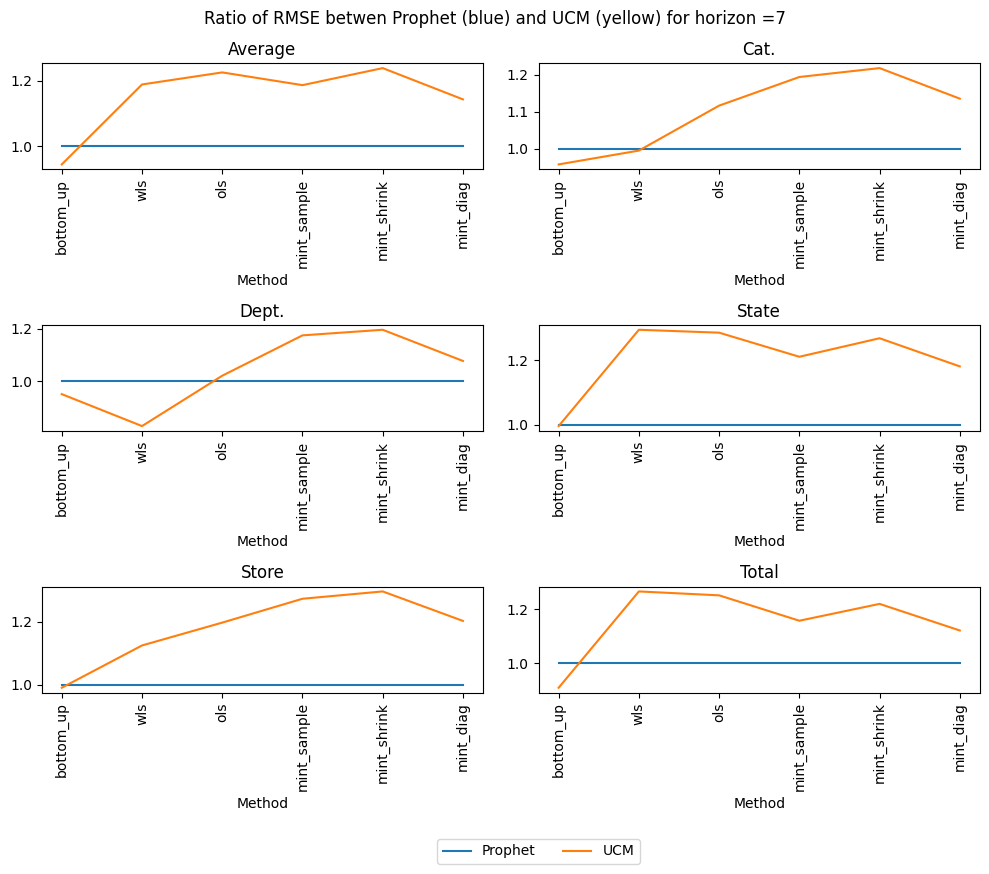

In [ ]:
dfComparison=dfComparison.div(dfComparison.iloc[:, 0], axis=0)

fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()
levels = dfComparison.index.levels[0]
# Plot each dfLevel in the corresponding subplot
for i, level in enumerate(levels):
    # Select the data for the current level
    dfLevel = dfComparison.loc[level]
    
    # Plot the data on the respective subplot
    dfLevel.plot(ax=axes[i], label=level, legend=None)
    
    # Set the title for the subplot
    axes[i].set_title(level)
    
    # Rotate x-ticks for better visibility
    axes[i].tick_params(axis='x', rotation=90)

# Show the plot
plt.tight_layout()
fig.suptitle('Ratio of RRMSE betwen Prophet (blue) and UCM (yellow) for horizon =' +str(h) ,y=1.02)
plt.legend(loc='center', bbox_to_anchor=(0, -1.5), ncol=6)  # Placing the legend below the grid
plt.show()

### Per iteration plot

In [14]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_ucm.pkl', 'rb') as file:
    ddOutputs_spatial_ucm = pickle.load(file) 
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_prophet_log.pkl', 'rb') as file:
    ddOutputs_spatial_prophet = pickle.load(file) 


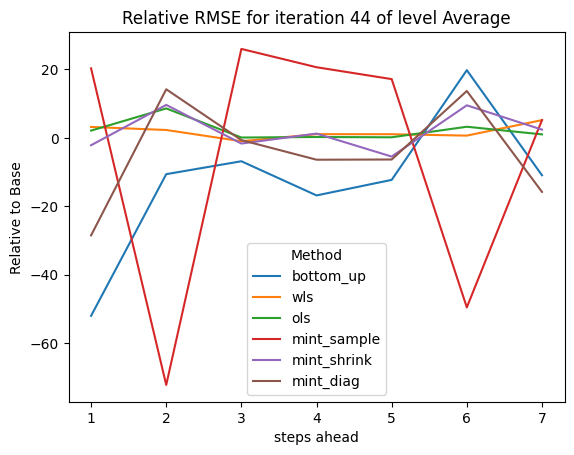

In [271]:
iter=44


ddOutputs=ddOutputs_spatial_ucm
horizon=7
relative='Base'
level='Average'
iters=int(ddOutputs['bottom_up']['mYhat'].shape[1]/horizon)
metric='RMSE'


lMethods=list(ddOutputs.keys())
lMethods.remove('top_down_ph')
lMethods.remove('top_down_hp')

plt.figure()
for method in lMethods:
    vValues = np.zeros(horizon)
    vValuesHat = np.zeros(horizon)
    
    for h in range(1, horizon+1):
        df = getCVResults(h=h, iOoS=horizon,ddOutputs=ddOutputs,  metric=metric, slices=slices, 
                          iters=iter, 
                          rolling=False)[method]
        vValues[h-1] = df[df.index == level][relative].item()  
     
    plt.plot(np.arange(1,horizon+1), vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Relative to {relative}")
plt.title(f"Relative {metric} for iteration {iter} of level {level}") 
# Show the plot
plt.show()



### Plot of iterations per h


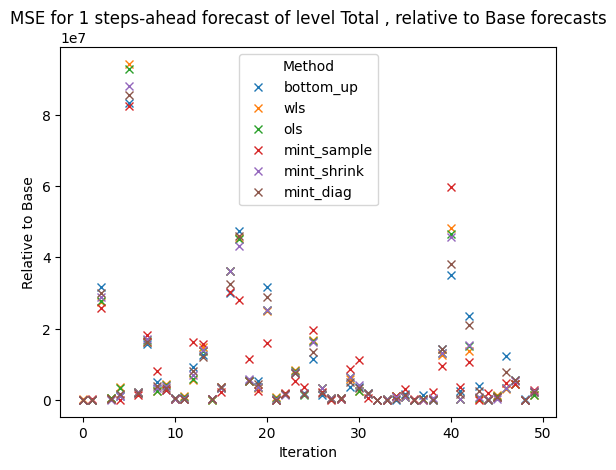

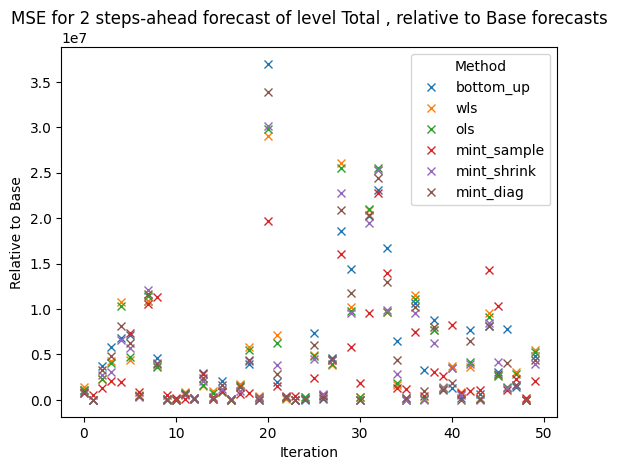

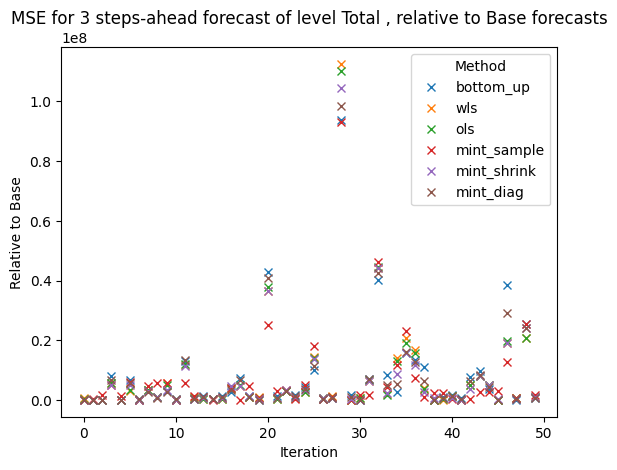

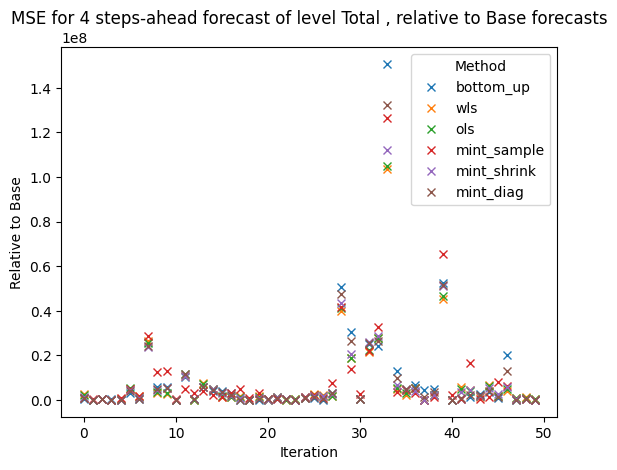

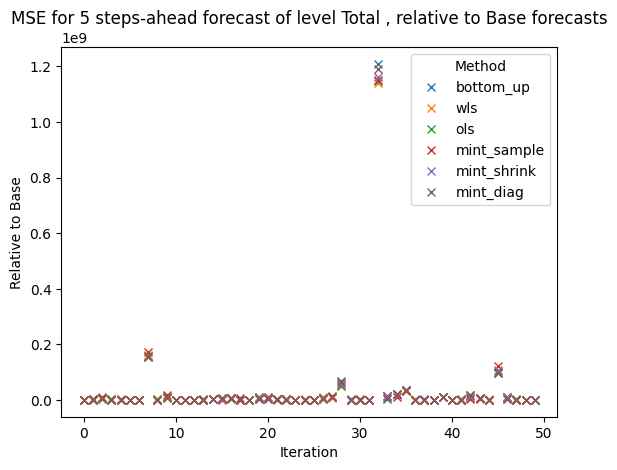

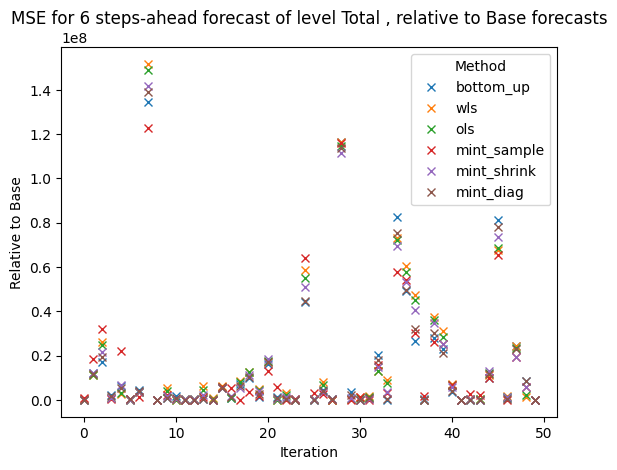

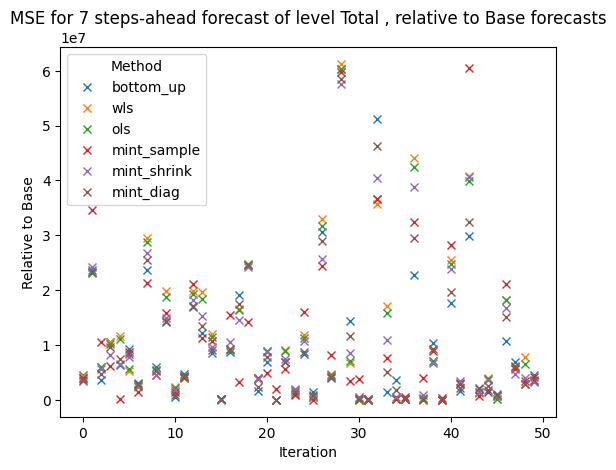

In [28]:
ddOutputs=ddOutputs_spatial_ucm
# ddOutputs=ddOutputs_spatial_prophet
# ddOutputs=ddOutputs_spatio_temporal_td

horizons=[1,2 ,3, 4,  5 , 6 , 7]



horizon=7
relative='Base'
level='Total'
iters=int(ddOutputs['bottom_up']['mYhat'].shape[1]/horizon)
metric='MSE'

lMethods=list(ddOutputs.keys())
lMethods.remove('top_down_ph')
lMethods.remove('top_down_hp')

plt.figure()
for h in horizons:
    for method in lMethods:
        vValues = np.zeros(iters)
        
        for iter in range(1, iters+1):
            df = getCVResults(h=h, iOoS=horizon,ddOutputs=ddOutputs, metric=metric, 
                            slices=slices, 
                            iters=iter, 
                            rolling=False,
                            relative=False)[method]
            vValues[iter-1] = df[df.index == level].item()    
        plt.plot(np.arange(iters), vValues,'x' ,label=method)

    plt.legend(title="Method")
    plt.xlabel("Iteration")
    plt.ylabel(f"Relative to {relative}")
    plt.title(f"{metric} for {h} steps-ahead forecast of level {level} , relative to {relative} forecasts")

    # Show the plot
    plt.show()

    
    
    



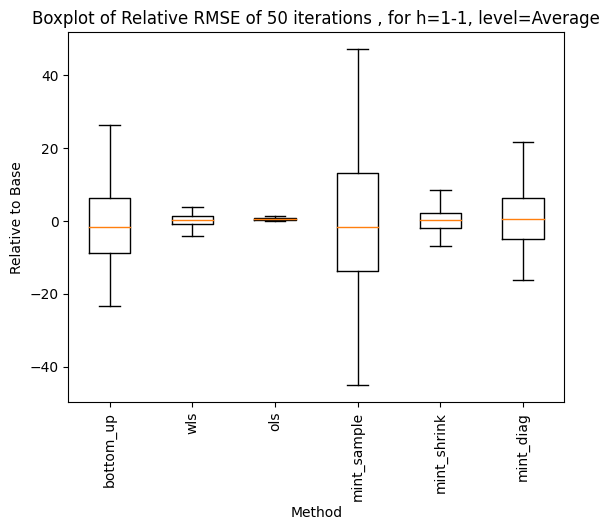

                min   max  mean  median    var
bottom_up    -85.74 26.14 -3.74   -1.71 380.64
wls           -4.52  3.80  0.02    0.11   3.28
ols            0.01  4.62  0.64    0.35   0.86
mint_sample -123.58 47.10 -6.59   -1.65 820.75
mint_shrink  -20.92 22.94  0.67    0.11  46.77
mint_diag    -58.96 21.66 -1.10    0.47 165.60


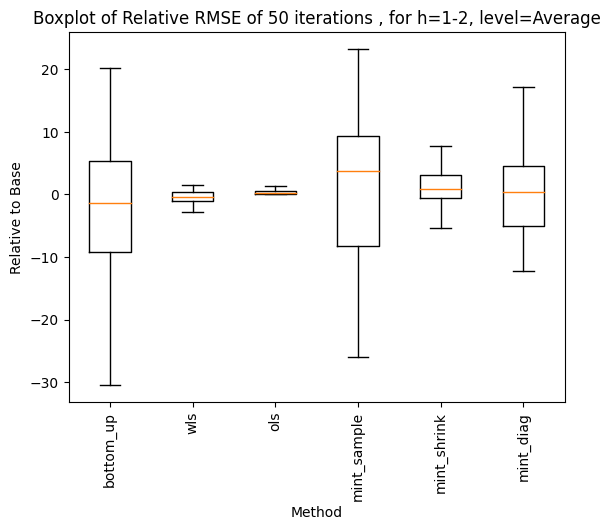

               min   max  mean  median    var
bottom_up   -61.58 34.44 -4.21   -1.30 298.73
wls          -5.12  2.98 -0.36   -0.37   1.84
ols           0.03  6.84  0.68    0.29   1.35
mint_sample -71.59 47.05 -2.92    3.77 547.43
mint_shrink -12.06 19.48  1.79    0.88  34.12
mint_diag   -28.78 27.00 -0.36    0.43  81.30


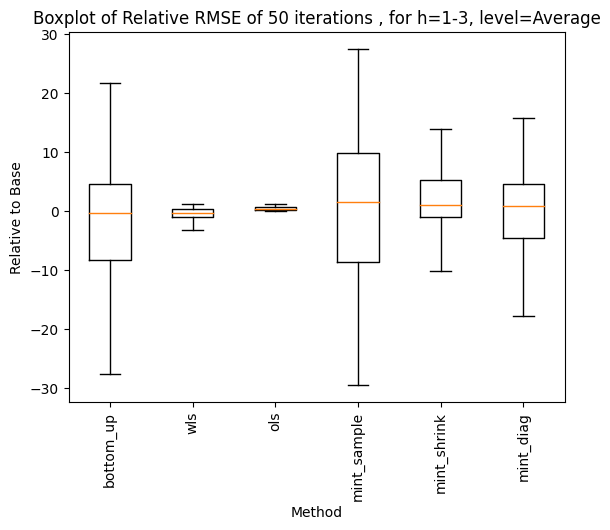

               min   max  mean  median    var
bottom_up   -61.94 21.68 -3.15   -0.30 216.33
wls          -4.27  2.58 -0.49   -0.36   1.52
ols           0.03  3.14  0.58    0.34   0.47
mint_sample -66.90 38.86 -1.71    1.50 432.18
mint_shrink -10.10 17.86  2.07    1.10  27.25
mint_diag   -22.69 19.29  0.02    0.85  61.22


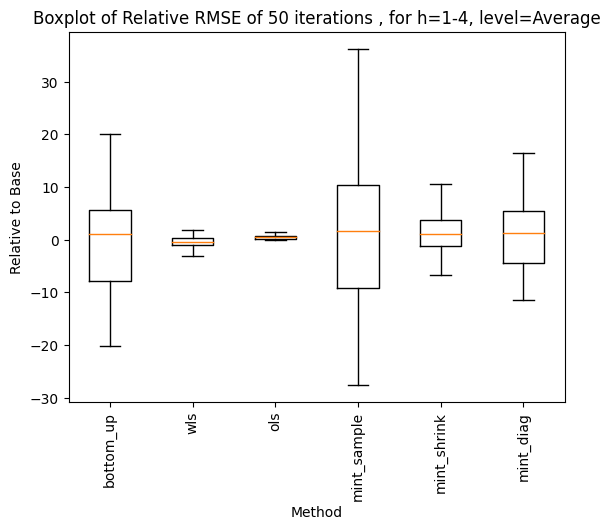

               min   max  mean  median    var
bottom_up   -74.60 20.12 -2.64    1.10 240.73
wls          -3.92  1.89 -0.46   -0.38   1.72
ols           0.03  3.48  0.59    0.43   0.38
mint_sample -55.68 36.26 -1.71    1.65 389.30
mint_shrink -14.52 18.71  1.78    1.18  32.24
mint_diag   -26.53 20.93  0.27    1.30  71.44


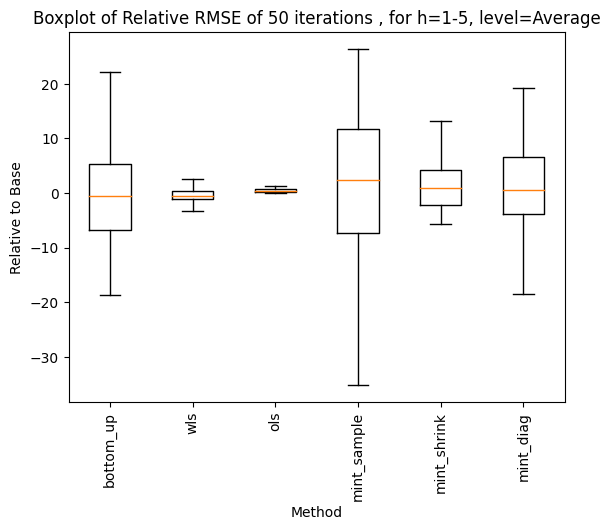

               min   max  mean  median    var
bottom_up   -72.38 24.49 -1.53   -0.54 230.53
wls          -4.61  2.61 -0.49   -0.51   2.30
ols           0.01  4.89  0.65    0.45   0.62
mint_sample -58.00 26.41 -0.26    2.37 290.10
mint_shrink  -5.64 19.76  2.00    0.95  30.70
mint_diag   -18.46 25.72  0.94    0.47  74.45


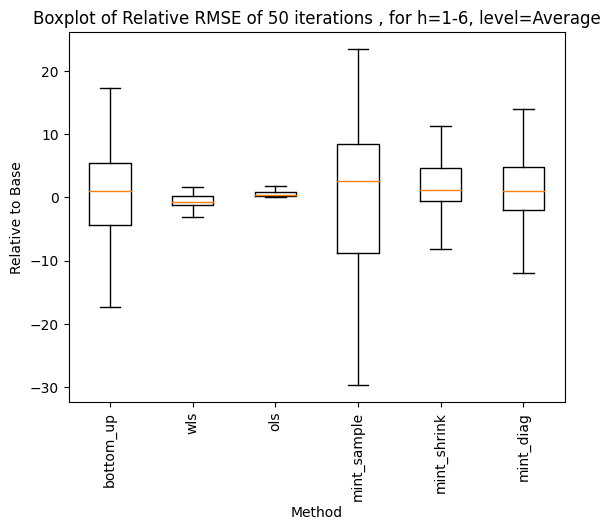

               min   max  mean  median    var
bottom_up   -66.74 25.01 -0.74    1.04 196.89
wls          -4.23  2.43 -0.66   -0.65   1.94
ols           0.01  5.03  0.67    0.42   0.69
mint_sample -53.19 23.52 -0.66    2.56 221.60
mint_shrink  -8.14 15.94  2.11    1.14  18.58
mint_diag   -16.38 21.79  1.53    1.08  62.27


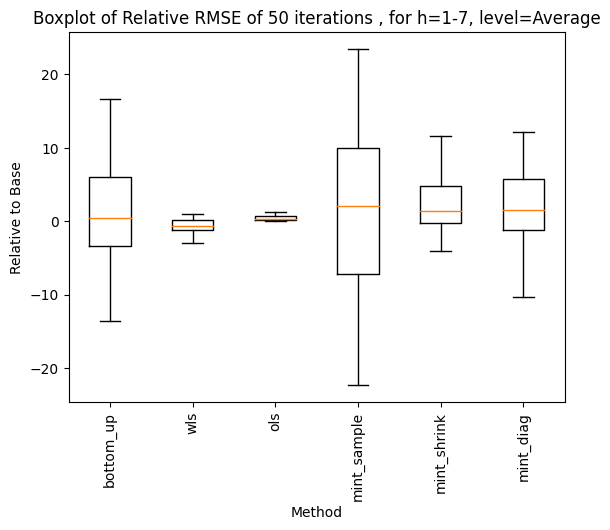

               min   max  mean  median    var
bottom_up   -47.14 25.72  0.35    0.41 122.80
wls          -3.21  0.97 -0.66   -0.61   1.16
ols           0.01  3.72  0.54    0.34   0.41
mint_sample -57.89 23.47 -0.13    2.08 195.03
mint_shrink  -4.05 11.60  2.16    1.36  13.81
mint_diag   -13.31 19.42  2.12    1.45  40.75


In [331]:
ddOutputs=ddOutputs_spatial_ucm
# ddOutputs=ddOutputs_spatial_prophet
# ddOutputs=ddOutputs_spatio_temporal_tdhp
horizons=[1,2,3,4,5,6,7]


horizon=7
relative='Base'
level='Average'
iters=int(ddOutputs['bottom_up']['mYhat'].shape[1]/horizon)
metric="RMSE"

lMethods=list(ddOutputs.keys())
lMethods.remove('top_down_ph')
lMethods.remove('top_down_hp')


### Here we should calculate the loss for each iteration , then plot the loss


plt.figure()
for h in horizons:
    data = []  # To store values for each method
    labels = []  # To store method names as labels
    
    for method in lMethods:
        vValues = np.zeros(iters)
        
        for iter in range(1, iters+1):
            df = getCVResults(h=h, iOoS =horizon, ddOutputs=ddOutputs,  metric=metric, 
                              slices=slices, 
                              iters=iter, 
                              rolling=True, relative=True)[method]
            vValues[iter-1] = df[df.index == level][relative].item()
        
        # Collect all values for the boxplot
        data.append(vValues)
        labels.append(method)
        
        

    # Create a boxplot for the current `h` step-ahead forecast
    plt.boxplot(data, labels=labels,showfliers=False)
    
    plt.xlabel("Method")
    plt.ylabel(f"Relative to {relative}")
    plt.xticks(rotation=90)
    plt.title(f"Boxplot of Relative {metric} of 50 iterations , for h=1-{h}, level={level}")

    # Show the plot
    plt.show()
    
    #print stats
    mData=np.vstack((np.min(data,axis=1),                 
                np.max(data,axis=1),
                np.mean(data,axis=1),
                np.median(data,axis=1),
                np.var(data,axis=1)
                ))
    dfStats=pd.DataFrame(data=mData.T, columns=['min', 'max', 'mean','median','var'], 
                         index=lMethods
                     )
    print(dfStats)

    



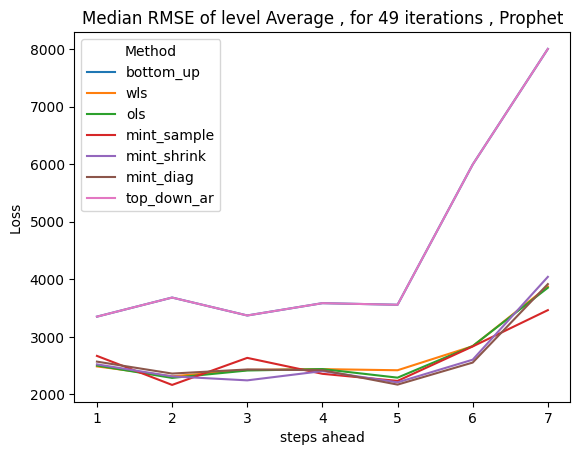

In [556]:
ddOutputs=ddOutputs_spatial_ucm
# ddOutputs=ddOutputs_spatial_prophet
# ddOutputs=ddOutputs_spatio_temporal_td


horizon=7
level='Average'
iters=int(ddOutputs['bottom_up']['mYhat'].shape[1]/horizon)
metric='RMSE'

lMethods=list(ddOutputs.keys())
lMethods.remove('top_down_ph')
lMethods.remove('top_down_hp')

plt.figure()
for method in lMethods:
    vValues = np.zeros(horizon)
    
    for h in range(1, horizon+1):
        df = getCVResults(h=h, iOoS =horizon, ddOutputs=ddOutputs , metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False, relative=False)[method]
        vValues[h-1] = df[df.index == level].item() 
            
    plt.plot(np.arange(horizon)+1, vValues, label=method)

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Loss ")
plt.title(f"Median {metric} of level {level} , for {iters-1} iterations , Prophet")


# Show the plot
plt.show()

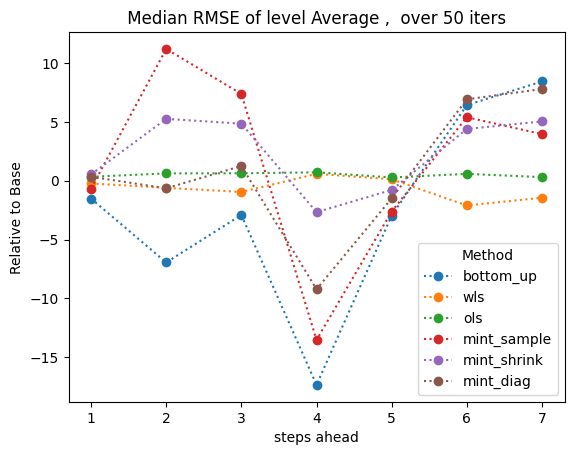

In [333]:
ddOutputs=ddOutputs_spatial_ucm
# ddOutputs=ddOutputs_spatial_prophet

horizon=7
relative='Base'
level='Average'
iters=int(ddOutputs['bottom_up']['mYhat'].shape[1]/horizon)
metric='MSE'

lMethods=list(ddOutputs.keys())
lMethods.remove('top_down_ph')
lMethods.remove('top_down_hp')
# lMethods.remove('mint_sample')

plt.figure()
for method in lMethods:
    vValues = np.zeros(horizon)
    
    for h in range(1, horizon+1):
        df = getCVResults(h=h, iOoS=horizon, ddOutputs=ddOutputs ,metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False)[method]
        vValues[h-1] = df[df.index == level][relative].item()    
    plt.plot(np.arange(horizon)+1, vValues, label=method,linestyle=':', marker='o')

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Relative to {relative}")
plt.title(f" Median R{metric} of level {level} ,  over {iters} iters ")

# Show the plot
plt.show()




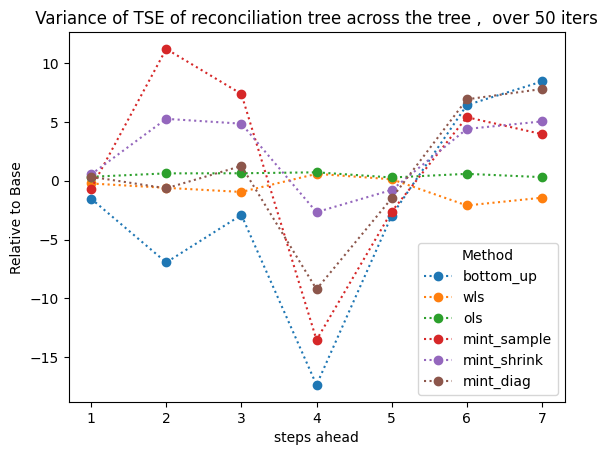

In [299]:
ddOutputs=ddOutputs_spatial_ucm
# ddOutputs=ddOutputs_spatial_prophet

horizon=7
relative='Base'
level='Average'
iters=int(ddOutputs['bottom_up']['mYhat'].shape[1]/horizon)
metric='TSE'

lMethods=list(ddOutputs.keys())
lMethods.remove('top_down_ph')
lMethods.remove('top_down_hp')
# lMethods.remove('mint_sample')

plt.figure()
for method in lMethods:
    vValues = np.zeros(horizon)
    
    for h in range(1, horizon+1):
        df = getCVResults(h=h, iOoS=horizon, ddOutputs=ddOutputs ,metric=metric, slices=slices, 
                          iters=None, 
                          rolling=False)[method]
        vValues[h-1] = df[df.index == level][relative].item()    
    plt.plot(np.arange(horizon)+1, vValues, label=method,linestyle=':', marker='o')

plt.legend(title="Method")
plt.xlabel("steps ahead")
plt.ylabel(f"Relative to {relative}")
plt.title(f" Variance of {metric} of reconciliation tree across the tree ,  over {iters} iters ")

# Show the plot
plt.show()


# Tables

In [68]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_ucm.pkl', 'rb') as file:
    ddCVOutputs_spatial_ucm = pickle.load(file) 


In [69]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsTemporal_sarimax_log.pkl', 'rb') as file:
    ddCVOutputs_spatial_temporal_sarimax = pickle.load(file) 
    

In [49]:
tree_spatial=Tree( dfData = df_data , sType='spatial') 
slices = [len([sublist for sublist in tree_spatial.list_of_leafs if sublist.count(None) == i]) for i, _ in enumerate(tree_spatial.levels)]
slices.append(1)


c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [50]:
slices

[70, 30, 10, 3, 1]

In [56]:
ddOutputs['bottom_up']['mYtilde'].shape

(114, 350)

In [57]:
ddOutputs_spatial_ucm['bottom_up']['mYtilde'].shape

(114, 350)

In [70]:
metric='RMSE'
relative=True
ddCVOutputs=ddCVOutputs_spatial_ucm
ddCVOutputs=ddCVOutputs_spatial_temporal_sarimax



getCVResults( h=7, iOoS=7, ddOutputs=ddCVOutputs , metric=metric , slices=slices , rolling=True, relative=relative, iters=None).drop(columns=['mint_diag'])


C:\Users\31683\AppData\Local\Temp\ipykernel_12944\1454550241.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  getCVResults( h=7, iOoS=7, ddOutputs=ddCVOutputs , metric=metric , slices=slices , rolling=True, relative=relative, iters=None).drop(columns=['mint_diag'])


Method   bottom_up           top_down_ph           top_down_hp            \
Relative      Base bottom_up        Base bottom_up        Base bottom_up   
Total       -30.90      0.00        1.25     24.56        1.13     24.47   
State       -22.82      0.00       -1.60     17.28       -1.72     17.18   
Store       -16.61      0.00       -1.62     12.86       -1.79     12.71   
Cat.        -16.60      0.00       -1.69     12.79       -1.81     12.69   
Dept.       -12.61      0.00       -0.59     10.67       -0.69     10.58   
Average     -26.07      0.00        0.02     20.70       -0.11     20.60   

Method   wls_svar              ols           wls_acov           wls_struct  \
Relative     Base bottom_up   Base bottom_up     Base bottom_up       Base   
Total      -13.19     13.53 -13.39     13.38   -13.63     13.19     -13.39   
State       -9.34     10.98  -9.29     11.02   -11.11      9.54      -9.29   
Store       -2.67     11.95  -2.54     12.07    -4.20     10.64      -2.54   
Cat.        -3.06     11.62  -2.72     11.90    -4.83     10.10      -2.72   
Dept.       -2.20      9.25  -1.84      9.57    -3.78      7.84      -1.84   
Average    -10.23     12.56 -10.29     12.52   -11.21     11.79     -10.29   

Method             wls_hvar           mint_sample           mint_shrink  \
Relative bottom_up     Base bottom_up        Base bottom_up        Base   
Total        13.38   -13.39     13.38      -19.00      9.10      -17.89   
State        11.02    -9.29     11.02      -14.21      7.01      -13.12   
Store        12.07    -2.54     12.07       -9.77      5.87       -7.64   
Cat.         11.90    -2.72     11.90       -9.60      6.01       -7.34   
Dept.         9.57    -1.84      9.57       -9.38      2.87       -6.41   
Average      12.52   -10.29     12.52      -16.03      7.97      -14.69   

Method              
Relative bottom_up  
Total         9.94  
State         7.90  
Store         7.70  
Cat.          7.94  
Dept.         5.51  
Average       9.03

In [ ]:
with open(os.getcwd()+'\\outputs\\ddCVOutputsSpatial_ucm.pkl', 'rb') as file:
    ddCVOutputs_spatial_ucm = pickle.load(file) 
    
mYhat=ddCVOutputs_spatial_ucm['bottom_up']['mYhat']
mYtrue=ddCVOutputs_spatial_ucm['bottom_up']['mYhat']
mYtilde=np.zeros((mYtrue.shape[0],mYtrue.shape[1]))

In [510]:
transform=None
initial=1911-7*50
period=7
horizon=7   
forecast_method='ucm'
iOoS=7
l_methods=["bottom_up", "top_down_ph" ,"top_down_hp", "wls",
                  "ols" ,'mint_sample','mint_shrink','mint_diag']
l_methods_temporal=["bottom_up", "top_down_ph" ,"top_down_hp" ,"ols","wls_svar" ,
                    "wls_acov", "wls_struct" , "wls_hvar" , "mint_sample", "mint_shrink" ,"mint_diag"]
dfHolidays=df_holidays
dfSNAP=df_snap
dfPrice=df_price
dfData=df_data

tree_spatial=Tree( dfData= dfData , sType='spatial') 

c:\Users\31683\Desktop\Hierarchical-Forecasting\Tree.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[level]=None


In [551]:
n=tree_spatial.mS.shape[1]
m=tree_spatial.mS.shape[0]
m0=np.full((n,m-1),0, dtype=int)

for iter in range(50):
    mY=tree_spatial.mY[:,:1911-(50-iter)*7]
     
    mP = mY[-70:]/mY[0,:]
    mP_diff=np.diff(mP,axis=1)
    num_rows = mP_diff.shape[0]
    mP_diff_forecast = np.zeros((num_rows, 8))
    mP_diff_forecast[:,0]=mP[:,-1]
    for i in range(0, num_rows):
        model = AutoReg(mP_diff[i], lags=7).fit()
        forecast = model.predict(start=len(mP_diff[i]), end=len(mP_diff[i]) + 6)
        # Opslaan in mP_forecast
        mP_diff_forecast[i, 1:] = forecast
    mP_forecast=mP_diff_forecast.cumsum(axis=1)[:,1:] 
    for h in range(0,7):
        mP=np.hstack((mP_forecast[:,h].reshape((-70,1)),m0))
        mYtilde[:, iter * 7 + h]=np.dot(np.dot(tree_spatial.mS,mP),mYhat[:,h])
        

In [552]:
ddOutputs_spatial_ucm['top_down_ar']=ddOutputs_spatial_ucm['bottom_up']
ddOutputs_spatial_ucm['top_down_ar']['mYtilde']=mYtilde

In [603]:
from statsmodels.tsa.statespace.structural import UnobservedComponents

mYtilde=np.zeros((mYtrue.shape[0],mYtrue.shape[1]))

n = tree_spatial.mS.shape[1]
m = tree_spatial.mS.shape[0]
m0 = np.full((n, m - 1), 0, dtype=int)

for iter in range(50):
    mY = tree_spatial.mY[:, :1911 - (50 - iter) * 7] 
    mProp = mY[-70:] / mY[0, :]
    
    num_rows = mProp.shape[0]
    mProp_forecast = np.zeros((num_rows, 7))

    for i in range(num_rows):
        # Fit UCM model (trend and seasonal components)
        model = UnobservedComponents(mProp[i], level='local linear trend', seasonal=7)
        result = model.fit(disp=False)

        # Forecast next 7 values
        forecast = result.forecast(steps=7)
        mProp_forecast[i,:] = forecast

    for h in range(7):
        mP = np.hstack((mProp_forecast[:, h].reshape((-70, 1)), m0))
        mYtilde[:, iter * 7 + h] = np.dot(np.dot(tree_spatial.mS, mP), mYhat[:, h])
    break



In [555]:
ddOutputs_spatial_ucm['top_down_ar']=ddOutputs_spatial_ucm['bottom_up']
ddOutputs_spatial_ucm['top_down_ar']['mYtilde']=mYtilde

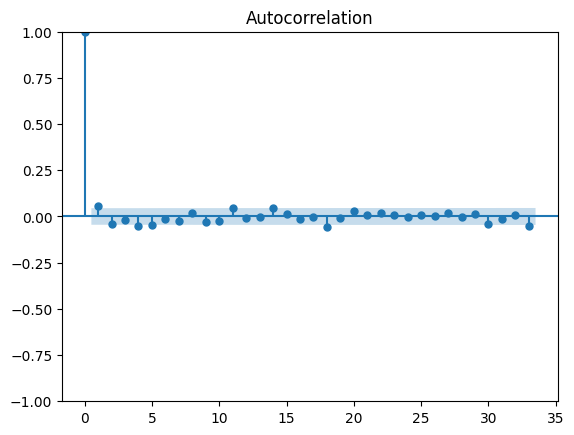

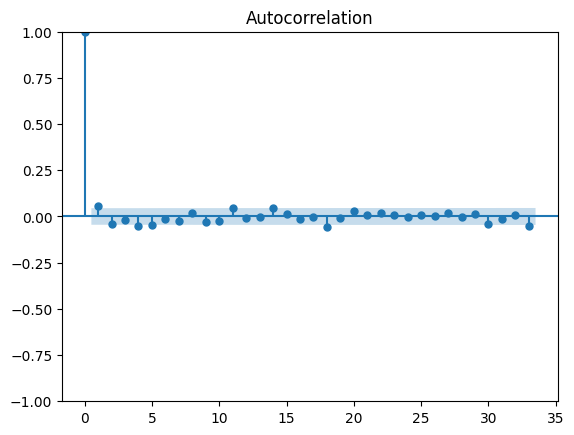

In [58]:
plot_acf(tree_spatial.dForecasters[i].vRes)

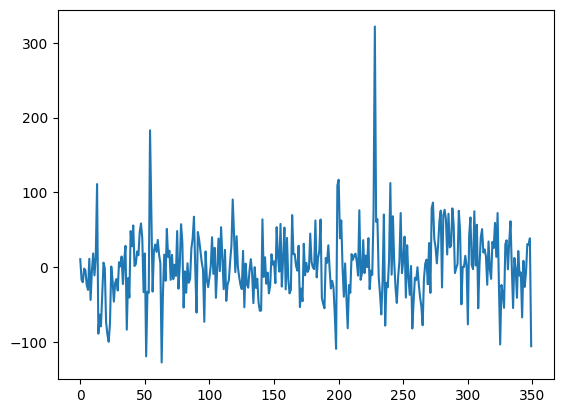

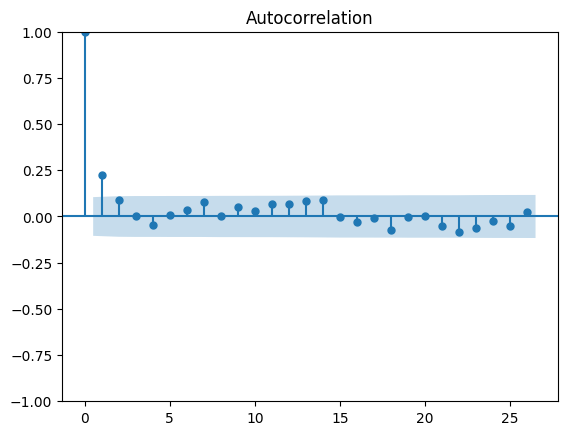

---- Hat ----


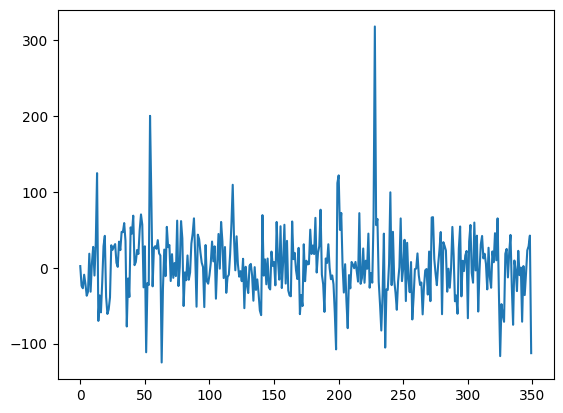

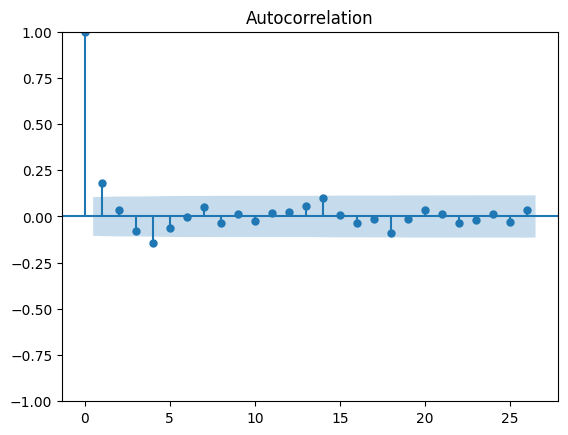

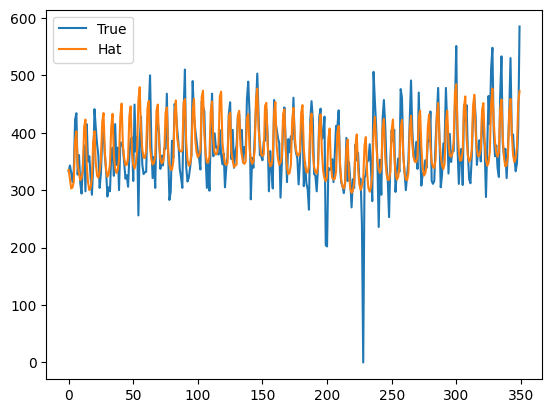

In [60]:
i=70

ddOutputs=ddOutputs_spatial_ucm
ddOutputs=ddOutputs_spatial_ucm
ddOutputs=ddOutputs_spatio_temporal_mint_sample
method='mint_sample'

vEtilde=ddOutputs[method]['mYtilde'][i,:]-ddOutputs[method]['mYtrue'][i,:]
plt.plot(vEtilde)
plt.show()
plot_acf(vEtilde)
plt.show()
print('---- Hat ----')

vEhat=ddOutputs[method]['mYhat'][i,:]-ddOutputs[method]['mYtrue'][i,:]
plt.plot(vEhat)
plt.show()
plot_acf(vEhat)
plt.show()

plt.plot(ddOutputs[method]['mYtrue'][i,:], label='True')
plt.plot(ddOutputs[method]['mYhat'][i,:],label='Hat')
# plt.plot(ddOutputs[method]['mYtilde'][i,:],label='Rec')

plt.legend()
plt.show()

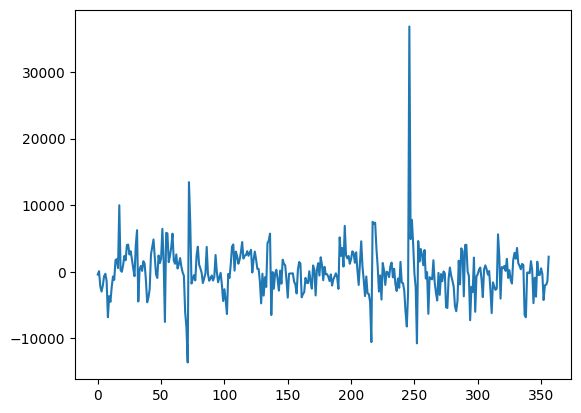

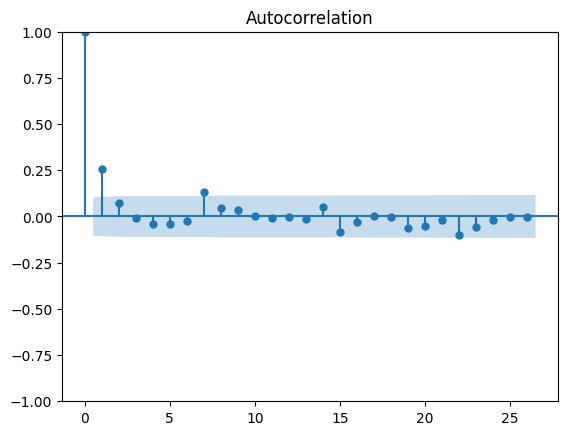

---- Hat ----


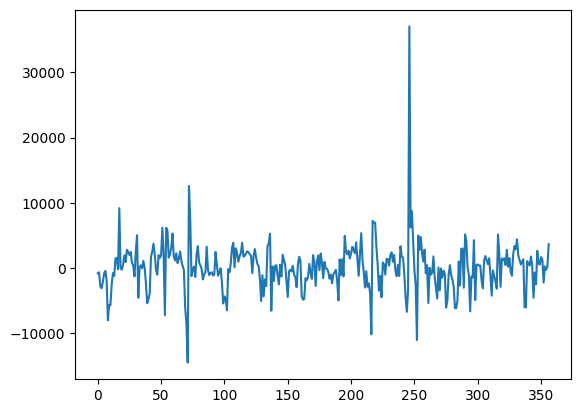

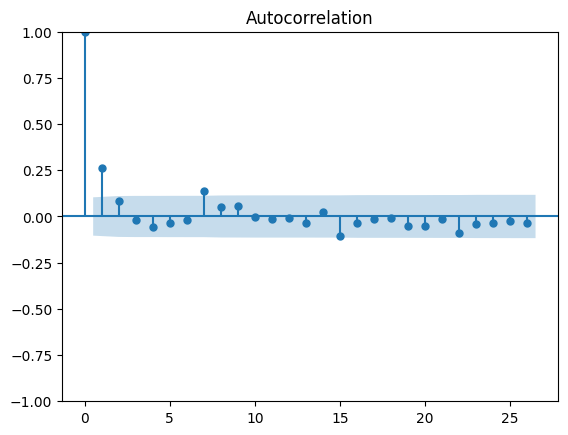

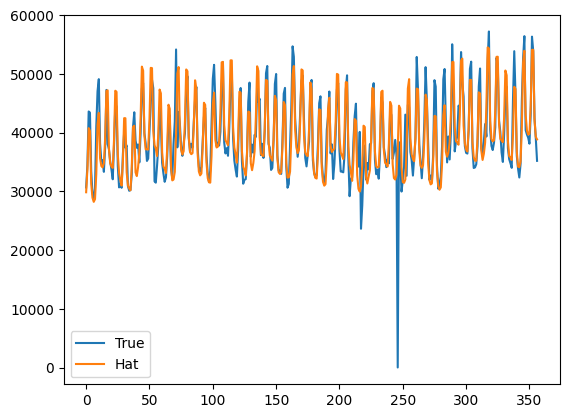

In [54]:
i=0
method='mint_sample'
ddOutputs=ddOutputs_spatial_prophet
vEtilde=ddOutputs[method]['mYtilde'][i,:]-ddOutputs[method]['mYtrue'][i,:]
plt.plot(vEtilde)
plt.show()
plot_acf(vEtilde)
plt.show()
print('---- Hat ----')

vEhat=ddOutputs[method]['mYhat'][i,:]-ddOutputs[method]['mYtrue'][i,:]
plt.plot(vEhat)
plt.show()
plot_acf(vEhat)
plt.show()

plt.plot(ddOutputs[method]['mYtrue'][i,:], label='True')
plt.plot(ddOutputs[method]['mYhat'][i,:],label='Hat')
# plt.plot(ddOutputs[method]['mYtilde'][i,:],label='Rec')

plt.legend()
plt.show()